# Exploring Structured Data from OCR'ed Text

**<< Previous module: [Structuring OCR'ed Text Data](05-StructuringOCRData.ipynb) <<**

*1.5-2.5 hours*

<div class="alert alert-block alert-info">
    <strong>Learning Objectives:</strong>
    <p>By the end of this module, you should be able to</p>
    <ul>
        <li>develop potential research questions based on a text dataset;</li>
        <li>perform basic exploratory analysis using Python, Voyant, Pandas, and other tools.</li>
    </ul>
</div>

## Table of Contents

- [Reading a Dataset](#reading-dataset)
- [Exploratory Questions](#exploratory-questions)
    - [Quantitive](#quantitative)
    - [Topics & Themes](#topics)
    - [Time](#time)
    - [Space](#space)
- [Wrap Up & Next Steps](#next-steps)
- [Resources](#resources)

<div class="alert alert-block alert-success">
    <p><strong><em>Congratulations!</em></strong> You've made it to the final module. All of the previous tutorials were dedicated to the processes that transform a text corpus into data: Optical Character Recognition, error correction, and data structuring. In this tutorial, we'll introduce ways that this data can now be explored as a means for developing research questions and new project directions.</p>
</div>

This is a long tutorial. If you need to, you can complete each of the major sections (Quantitative, Topics & Themes, Time, and Space) separately. 

**Note that changes may not be saved in Binder. If you want to save your work:** You can always save your work by following our instructions to install and run these modules locally, or you can use `File > Download as...` in the menu above. When you return, reload Binder, and click the Jupyter icon at the top of this notebook. Click `Upload` at the top of the file list to upload your saved version of this tutorial.

**Each time you return, please run the first script below to reload the dataset.**

## Reading a Dataset <a class="anchor" id="reading-dataset"></a>

Let's start by loading in the dataset that we created in the [last module](05-StructuringOCRData.ipynb):

In [ ]:
# Import the pandas library. We'll continue to use it to manipulate 
# our dataset.
import pandas

# Read in the jclaws_dataset.csv that we created in the last module. 
# Store the dataset in a pandas dataframe called "df".
df = pandas.read_csv("jclaws_dataset.csv", sep ="|")

# Show us a preview of the dataset.
df.head(10)

**Take a moment to examine this preview of the Jim Crow laws dataset.** What kinds of questions might we be able to ask and answer using computational methods? What kinds of questions might we *not* be able to ask and answer using computational methods? *Before moving on to the next section, write down a few questions that come to mind.*

### Hints for Reading a Dataset
- **Look for patterns & outliers:** As you study a dataset, look for common values or what could look like trends in information categories, quantitities, locations, temporalities, etc. Equally, look for exceptions, or values that are unique or occur rarely.
- **Read the columns:** Instead of reading one row at a time, try reading a column at a time. What kinds of information are available in each of the columns? Are they numeric, temporal, categorial (e.g. text), or other kinds of data? Can any of the rows be *compared* in any way?
- **Consider quantities:** What kinds of information can be *counted* and *compared*? How might quantitative data be useful or not?
- **Consider topics:** For columns with textual data, what can we learn about common or uncommon themes, topics, or categories within the dataset?
- **Consider time:** Is it possible to view the dataset over time?
- **Consider space:** Can any of the information in the dataset be mapped to explore possible spatial patterns?

If elements such as space or time are not visible in the current dataset, what kinds of changes might we need to make to the dataset to make those accessible here? **This dataset's shape (its current columns, for example) is not set in stone.** We can and will continue to modify the dataset's structure by changing how data are represented and/or adding new columns throughout this module.

## Exploratory Questions <a class="anchor" id="exploratory-questions"></a>

The Jim Crow laws dataset contains a variety of information types: quantitative (e.g. WordCount, IdentifiedBy, and LawType), thematic or topical (SectionText and ChapterTitle), temporal (Volume), and spatial (SectionText and ChapterTitle). Here are some of the questions that they bring to mind:

**Quantitative:** 
- How many laws are there in this corpus?
- How many laws were identified by experts? How many were identified by the computer model?
- How many laws are categorized as Public Laws, Private Laws, or Session Laws?
- How many laws per volume have been identified?
- What is the average length of a Jim Crow law? 

**Topics & Themes:**
- Which words or phrases occur most frequently in the corpus?
- How are commonly appearing words used in context?

**Temporal:**
- How many laws per year have been identified?

<mark style="background-color:lightblue;">**Spatial:**</mark>
- How many laws were passed at a local level? At a state level?
- <mark style="background-color:lightblue;">Where in North Carolina were Jim Crow laws adopted?</mark>

This list of questions is *not exhaustive*, and we will not cover all of the questions here but demonstrate the tools you can use to try to answer them. Each question category, or information type, is also *not exclusive*. Often, questions in one category above draw on information found in another category. 

## Quantitative <a class="anchor" id="quantitative"></a>

Analyzing quantitative information in our dataset can give us an overview, or big picture, of our dataset that can help us to identify additional questions or avenues for exploration. This information *likely will not* provide any definitive or detailed understanding of our corpus but can provide some direction as we dive deeper.

- How many laws are there in this corpus?
- How many laws were identified by experts? How many were identified by the computer model?
- How many laws are categorized as Public Laws, Private Laws, or Session Laws?
- How many laws per volume have been identified?
- What is the average length of a Jim Crow law? 
- Do longer or shorter laws focus on only certain topics?

### How many laws are there in this corpus?

This first question may seem elementary, but we need to know the size of our dataset in order to understand the relative significance of other quantitative questions:

In [ ]:
# In the dataframe (df), count the number of rows (.count()) based 
# on the first (lefthand) column, "[0]", which is the dataframe index. 
# The index applies a unique value to each row, beginning with 0.
df.count()[0]

The above script should print a number, which is the number of rows in the corpus. In other words, the number of Jim Crow laws in the corpus.

### How many laws were identified by experts? How many were identified by the computer model?

To answer this question, we need to ask Python to count all of the *unique* values in the IdentifiedBy column. First, let's ask for a list of unique values so that we know how many to expect:

In [ ]:
# In the dataframe (df), look in the "IdentifiedBy" column,
# and print a list of all the unique values in that column.
df.IdentifiedBy.unique()

We should have been returned a list containing the following values:

- **model:** The law was identified by the computer model as being Jim Crow based on the training set of expert-identified Jim Crow laws.
- **xpert:** The law was identified by at least one expert as being Jim Crow.
- **nan:** The IdentifiedBy field for this row is empty or contains unrecognizable data. ("nan," or "NaN," stands for "Not a Number.")

Now that we know which values to expect, let's count how many times they appear in the corpus:

In [ ]:
# In the dataframe (df) column "IdentifiedBy,"
# count all of the unique values.
df['IdentifiedBy'].value_counts()

The above command should have produced a list of the values in "IdentifiedBy" and the number of time they appear. Note that "nan" is not counted, meaning that there are no "nan" values in the column.

While a list such as this can be fairly straightforward to read and consider, we may want to view such results visually to help us quickly grasp this quantitative information. A simple way to do this is to use the <a href="https://matplotlib.org/" target="blank">Matplotlib</a> Python library alongside Pandas:

In [ ]:
# First, we'll need to create a new dataframe from the IdentifiedBy 
# counts above:

# Store the list of values created above in a variable called 
# "valueCounts".
valueCounts = df['IdentifiedBy'].value_counts()

# Create a new dataframe, "identifiedByDF," using valueCounts.
identifiedByDF = pandas.DataFrame(valueCounts)

# Set the row numbers (index) for the new dataframe.
identifiedByDF = identifiedByDF.reset_index()

# Create the column names for the IdentifiedBy dataframe.
identifiedByDF.columns = ['IdentifiedBy', 'Count']

# Show a preview of the IdentifiedBy dataframe.
identifiedByDF.head()

In [ ]:
# Now that we have our new dataframe, we can create a bar chart:

# We just need one part of matplotlib, the pyplot module.
# We'll import pyplot and call it "plt" for short.
import matplotlib.pyplot as plt

# Assign the x and y axes to specific columns.
identifiedByDF.plot(x ='IdentifiedBy', y='Count', kind = 'bar')

# Show us the resulting bar chart.
plt.show()

**Now let's consider the data:** Which method most frequently identified a law as Jim Crow? What might this say about the corpus and the process used to identify Jim Crow laws?

### How many laws are categorized as Public Laws, Private Laws, or Session Laws?

We can apply a similar approach as we did above to investigate the different law types. Can you modify each code block below to produce an answer to this question? (Look for hints in the # comments!)

1. Identify the unique values in the column specifying law types.

In [ ]:
# Replace "COLUMNNAME" with the correct column name for law types.
df.COLUMNNAME.unique()

2. Count the unique vales in the "LawType" column.

In [ ]:
# Replace "COLUMNNAME" with the correct column name for law types.
df['COLUMNNAME'].value_counts()

3. Create a new dataframe to hold the unique values and their counts.

In [ ]:
# Replace "COLUMNNAME" with the correct column name for law types.
valueCounts = df['COLUMNNAME'].value_counts()

# Replace "cHANGEMEDF" with a new name for the law types dataframe.
# Make sure you change ALL mentions of this dataframe below.
cHANGEMEDF = pandas.DataFrame(valueCounts)

# Set the row numbers (index) for the new dataframe.
cHANGEMEDF = cHANGEMEDF.reset_index()

# Create the column names for the law types dataframe.
# Replace "COLUMN 1" and "COLUMN 2" with descriptive names!
cHANGEMEDF.columns = ['COLUMN 1', 'COLUMN 2']

# Show the IdentifiedBy dataframe.
cHANGEMEDF

4. Optionally, create a bar chart to aid quick reference.

In [ ]:
# Just in case, we'll reimport the pyplot module from matplotlib.
import matplotlib.pyplot as plt

# Replace "cHANGEMEDF" with your name for the law types dataframe.
# Replace "COLUMN 1" and "COLUMN 2" with your column names!
cHANGEMEDF.plot(x ='COLUMN 1', y='COLUMN 2', kind = 'bar')

# Show us the resulting bar chart.
plt.show()

*What kinds of new questions or observations does this process reveal about law types in the corpus? What would you do next to continue exploring different law types?*

### How many laws per volume have been identified? <a class="anchor" id="laws-per-volume"></a>


As with calculating the quantities of different law types and identifiers, we can use Pandas' `value_counts()` function to count how many times a volume appears in the dataset. To do this, which column should we count? Insert the column name you think should be used in the script below and then run the script:

In [ ]:
# Replace "COLUMNNAME" with the correct column name for volume years.
df['COLUMNNAME'].value_counts()

Let's look at this list as a line chart. Note that we've combined the dataframe creation and chart creation steps from the previous question into one script. *Does this change how the steps are performed? If so, how?* 

Previously, we've created bar charts, but we've altered the script slightly to create a line chart. *Can you identify where we've made that change?*

Again, add the correct column name to the script below before running.

In [ ]:
# Just in case, we'll reimport the pyplot module from matplotlib.
import matplotlib.pyplot as plt

# Replace "COLUMNNAME" with the correct column name for volume years.
valueCounts = df['COLUMNNAME'].value_counts()

# Create a new dataframe for volumes.
volumesDF = pandas.DataFrame(valueCounts)

# Set the row numbers (index) for the new dataframe.
volumesDF = volumesDF.reset_index()

# Create the column names for the volumes dataframe.
# Replace "COLUMN 1" and "COLUMN 2" with descriptive names!
# HINT: COLUMN 1 will be volume years, and COLUMN 2 will hold 
# the number of times that volume year appears.
volumesDF.columns = ['COLUMN 1', 'COLUMN 2']

# Plot the line graph, assigning each column to an axis.
# Replace "COLUMN 1" and "COLUMN 2" with your column names!
volumesDF.plot(x ='COLUMN 1', y='COLUMN 2', kind = 'line')

# Show us the resulting line chart.
plt.show()

At first glance, this graph seems to tell us a compelling story, but take a closer look: **What's wrong with this graph?** HINT: look at the list of unique values that we calculated a moment ago. 

The chart's data are currently sorted by count -- that is, the highest number of laws per volume down to the lowest. That's not technically *wrong*, but it might be showing us a false narrative if what we are expecting to see is the number of laws per volume *by order of publication*. Let's now rerun the above script but add in Pandas' `sort_values()` function to order the chart by year. 

*This time, the column names are provided:*

In [ ]:
# Just in case, we'll reimport the pyplot module from matplotlib.
import matplotlib.pyplot as plt

# Count the number of times each volume year appears in the dataframe.
valueCounts = df['Volume'].value_counts()

# Create a new dataframe for volumes.
volumesDF = pandas.DataFrame(valueCounts)

# Set the row numbers (index) for the new dataframe.
volumesDF = volumesDF.reset_index()

# Create the column names for the volumes dataframe.
volumesDF.columns = ['Volume', 'Count']

# We ADDED this line to sort the volumes dataframe by the year/volume.
volumesDF = volumesDF.sort_values(by='Volume')

# Plot the line graph, assigning each column to an axis.
volumesDF.plot(x ='Volume', y='Count', kind = 'line')

# Show us the resulting line chart.
plt.show()

Now we're getting somewhere. You should now see the Volumes ordered from earliest to latest along the X axis. But what's *still* not quite right about this chart? We used year(s) of publication to identify each volume, so this graph also appears to show the number of Jim Crow laws passed per year, but is it *actually*? Are *all years* between 1865-1966 represented? How does the line above reveal or obscure this information? Is there a better way to visualize laws per volume?

Skip ahead to the Time section where we ask ["How many laws per year have been identified?"](#laws-per-year) to see how we can visualize all years 1865-1966.

### What is the average length of a Jim Crow law?

Remember that we have included word count in our dataset:

In [ ]:
df.head()

First, we can add together all of the word counts:

In [ ]:
# Create an empty variable to collect the sum of all word counts.
total = 0

# For each word count in the WordCount column:
for count in df['WordCount']:
    
    # Add the word count to the total.
    total = count + total

# Show us the total number of words in the Jim Crow corpus.
print(total)

Now let's divide the total word count by the total number of laws to get an average:

In [ ]:
# Divide the total number of words in the corpus by the number of laws.
# Replace "NUMBER OF LAWS" with the number generated earlier in 
# this module. ("How many laws are there in this corpus?")
averageCount = total / NUMBER OF LAWS

print(averageCount)

*What might average word count tell us? What does it **not** tell us? What kinds of new questions does it raise?*

## Topics & Themes <a class="anchor" id="topics"></a>

Computational text analysis, or text mining, is one method for exploring text corpuses. There are many ways, with varying complexity, to perform text analysis. Common text analysis methods used to explore a corpus include

- <strong><mark style="background-color:lightgreen">word frequency</mark></strong>: Counting the number of times a word appears in a corpus. A common goal with this method is to identify popular or frequently appearing words and possible patterns in their usage.
- **collocation**: Counting occurrences of 2 or more words appearing near one another. Collocation can be used to identify possible relationships between the appearance of different words close together in a corpus.
- <strong><mark style="background-color:lightgreen">**n-grams**</mark></strong>: Counting the appearance of 2+ word phrases. As with word frequency, a common goal is to identify frequently occurring phrases and possible patterns in their usage.
- <strong><mark style="background-color:lightgreen">concordance</mark></strong>: Viewing the context(s) in which a word appears.
- **entity recognition**: Identifying names, places, etc.
- **dictionary tagging**: Looking for specific words within a text.
- **topic modeling**: Grouping texts in a corpus together based on the presence of specific terms. The aim with topic modeling is to create semantically meaningful groups and to look for patterns in those groupings.

We will look at only some of these methods (<mark style="background-color:lightgreen">highlighted in green</mark>) using a few different tools, but know that there are many resources available for learning text analysis. Check [Resources](#resources) below for suggested tutorials to get you started.

As a reminder, here are the questions we'll be addressing:

- Which words or phrases occur most frequently in the corpus?
- How are commonly appearing words used in context?

### Explore the corpus first with Voyant. <a class="anchor" id="voyant"></a>

Before we look at these specific questions, let's take a few minutes to explore the corpus in <a href="https://voyant-tools.org/" target="blank">Voyant</a>, a digital humanities tool for exploring digitized texts:

<a href="https://voyant-tools.org/" target="blank"><img src="images/10-explore-02.jpeg" width="90%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture of Voyant's landing page." title="Screen capture of Voyant's landing page."/></a>

1. [Download the Jim Crow corpus text file](https://cdr.lib.unc.edu/downloads/6q182r84s?locale=en) and save it to an easy-to-find location on your computer (e.g. the Desktop).
2. Navigate to <a href="https://voyant-tools.org/" target="blank">Voyant</a>.
3. Click "upload," and open the Jim Crow corpus text file in Voyant.
4. A new page will load that looks something like this:

<img src="images/10-explore-03.jpeg" width="90%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing the Jim Crow laws corpus in Voyant's default interface." title="Screen capture showing the Jim Crow laws corpus in Voyant's default interface."/>

5. Take a look at each of the 5 smaller windows in Voyant. What do they show? How can you interact with them? When you click on a word or icon in one window, what happens in other windows? 

6. Hover over or click on a blue question mark (<span style="font-weight:600; color:blue">?</span>) to learn more about each window.

<img src="images/10-explore-04.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing Voyant's explanation of the Cirrus visualization." title="Screen capture showing Voyant's explanation of the Cirrus visualization."/>

7. We can use the word cloud, "Cirrus," window in the top left to begin exploring word frequency. The larger words in this visualization appear more frequently across the corpus. Which words do you see? 

<img src="images/10-explore-05.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing Voyant's Cirrus visualization." title="Screen capture showing Voyant's Cirrus visualization."/>

8. Use the "terms" slider below the word cloud to increase the number of words shown in the word cloud.

9. Click on "Terms" next to "Cirrus" above the word cloud to see a list of words in order by frequency. 

<img src="images/10-explore-06.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing Voyant's Terms visualization." title="Screen capture showing Voyant's Terms visualization."/>

10. Clicking on a word can show us when it is used across the text in the "Trends" window at top right. The corpus is separated as evenly as possible into segments along the X axis.

<img src="images/10-explore-07.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing Voyant's Trends visualization." title="Screen capture showing Voyant's Trends visualization."/>

11. We can also see its usage across the corpus in the "Contexts" <a href="https://en.wikipedia.org/wiki/Key_Word_in_Context" target="blank">keyword-in-context concordance</a> window at bottom right. Click the + icon to the left of one of the entries to see a larger view of one usage. Use the "expand" slider to increase or decrease the amount of text shown here. 

<img src="images/10-explore-08.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing Voyant's Terms visualization." title="Screen capture showing Voyant's Terms visualization."/>

12. The "Reader" in the top middle can show further context for individual instances. Click on a word in "reader" to change the "Trends" and "Contexts" windows.

<img src="images/10-explore-09.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing Voyant's Reader window with a term selected." title="Screen capture showing Voyant's Reader window with a term selected."/>

13. Let's return to the Cirrus word cloud visualization. There are likely several words that occur very frequently that provide less insight than their smaller counterparts. Examples might include the verbs "shall" and "said" or the abbreviation "sec" for "section." We might also want to filter out "north," "carolina," and "state." Many of the very common words, known as <a href="https://en.wikipedia.org/wiki/Stop_word" target="blank">stopwords</a> in computing, have already been filtered out. We can view and add to this list by clicking the toggle icon next to the blue question mark (<span style="font-weight:600; color:blue">?</span>) at the top right of the Cirrus window:

<img src="images/10-explore-10.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing the options toggle icon." title="Screen capture showing the options toggle icon."/>

14. An Options popup window will appear, displaying a number of different settings. For this module, we'll focus only on the stopwords. However, <a href="https://guides.library.ucsc.edu/DS/Resources/Voyant#s-lg-box-wrapper-29088760" traget="blank">this tutorial</a> explains more about working with Cirrus in Voyant. Next to "Stopwords Auto-detect," click "Edit List."

<img src="images/10-explore-11.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing the options popup window." title="Screen capture showing the options popup window."/>

15. A list of numbers, punctuation marks, and words will appear. Scroll through these to get a sense of what has been excluded from the word cloud. We can remove or add words to this list. Try adding words such as "north," "carolina," "state," "laws," "shall," "said," and any other commonly used words in this corpus that you might wish to exclude from analysis. Click "Save."

<img src="images/10-explore-12.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing the stop words list." title="Screen capture showing the stop words list."/>

16. Your new stopword list has been saved on Voyant's server and should now by named "keywords-XXXX" with some string of letters and numbers. Clicking "Reset" in the Options popup window will delete your customized list, and clicking "Confirm" will save it. You can return later and edit this list. For now, click "Confirm."

<img src="images/10-explore-13.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing the edited options popup window." title="Screen capture showing the edited options popup window."/>

17. View the new word cloud: how has the visualization changed? What does the Terms list show to be the most common words? What kinds of questions come to mind? Are there terms listed that surprise you? Why or why not? Make a short list of these and use Cirrus and the other Voyant visualizations to explore them. 

<img src="images/10-explore-14.jpeg" width="50%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Screen capture showing the revised Cirrus word cloud." title="Screen capture showing the revised Cirrus word cloud."/>

You can take as much or as little time exploring Voyant as you like--you could even try answering the remaining questions in this section using Voyant. Save the URL for the Voyant page you've created, and you'll be able to come back to it later.

You can learn more about Voyant by reading its <a href="https://voyant-tools.org/docs/#!/guide/about" target="blank">tutorials and documentation</a>.

### Which words occur most frequently in the corpus?

We began by exploring the corpus of North Carolina Jim Crow laws using Voyant, and we saw one way, using the Terms list, to view the corpus' most frequently appearing words. Remember that the structure of this list changes depending on whether we add or remove stopwords. Now, let's look at how we can answer this question using Python.

In the [How to OCR module](05-StructuringOCRData.ipynb), we used the <a href="https://www.nltk.org/index.html" target="blank">NLTK (Natural Language Processing Toolkit)</a> to count the number of total words in each law. This time, we'll use NLTK to count the number of times each word appears across the corpus. Here is a simple way to do this.

First, let's make sure we can access the corpus text file *in the same folder as this module.* This script may look familiar because we used it in the [previous module](05-StructuringOCRData.ipynb) as well.

In [ ]:
# Requests helps us call up a webpage, or link to a file stored online,
# and access the content.
import requests

# Create a variable to hold the direct link to the text file.
url = 'https://cdr.lib.unc.edu/downloads/6q182r84s?locale=en'

# Here's where we use the requests module to call up
# the content at the url we specified above.
r = requests.get(url)

# Create and open a new empty text file.
with open('on_the_books_text_jc_all.txt', 'wb') as f:
    
    # Write the contents of the online file into the new file.
    f.write(r.content)

# When finished, print the following:
print('Corpus downloaded.')

Now let's run NLTK:

In [ ]:
# Import the word_tokenize and punkt modules from the nltk 
# ("Natural Language Processing Kit") library.
# NLTK is a powerful toolset we can use to manipulate 
# and analyze text data.
import nltk
from nltk import word_tokenize
from nltk import punkt

# We'll also use Pandas to create a dataframe (table) of word 
# frequencies.
import pandas as pd

# Open the corpus file, and read it.
corpus = open("on_the_books_text_jc_all.txt", "r")
corpus = corpus.read()

# Create a list of words.
tokens = word_tokenize(corpus)

# Make all the words lowercase so that words such as "THE", 
# "The", and "the" are all counted as the same word.
tokens = [token.lower() for token in tokens]

# Count the number of times each word appears in the corpus.
wordFreq = nltk.FreqDist(tokens)

# Make a new Pandas dataframe for easier reading.
wordFreqDF = pd.DataFrame(list(wordFreq.items()),columns = ['word','count']) 

# Sort the dataframe so that the most frequently occurring terms 
# appear first.
wordFreqDF.sort_values(by=['count'], inplace=True, ascending=False)

# Show us the first 20 entries in the dataframe.
# We ask for 21 rows because the row with column names is included.
wordFreqDF.head(21)

*What do you notice about the most common terms in this list? How are these similar to or different from the word cloud we created in Voyant?*

The list currently begins with a number of stopwords and punctuation. We can remove these as we did in Voyant, this time using NLTK:

In [ ]:
# Import the word_tokenize module from the nltk 
# ("Natural Language Processing Kit") library.
# NLTK is a powerful toolset we can use to manipulate
# and analyze text data.
import nltk
from nltk import word_tokenize

# Download the stopwords list from NLTK.
nltk.download('stopwords')

# We'll also use Pandas to create a dataframe (table) of 
# word frequencies.
import pandas as pd

# Open the corpus file and read it.
corpus = open("on_the_books_text_jc_all.txt", "r")
corpus = corpus.read()

# Select the English list of stopwords from NLTK.
stopWords = nltk.corpus.stopwords.words('english')

# Create a list of words.
tokens = word_tokenize(corpus)

# Make all the words lowercase so that words such as 
# "THE", "The", and "the" are all counted as the same word.
tokens = [token.lower() for token in tokens]

# Create a new empty list for the tokens NOT considered stopwords.
filteredTokens = [] 

# Go through the tokens list, pull out each word that is not 
# a stopword, and add it to the filteredTokens list.
for w in tokens: 
    if w not in stopWords: 
        filteredTokens.append(w) 

# Count the number of times each word appears in the corpus.
wordFreq = nltk.FreqDist(filteredTokens)

# Make a new Pandas dataframe for easier reading.
wordFreqDF = pd.DataFrame(list(wordFreq.items()),columns = ['word','count']) 

# Sort the dataframe so that the most frequently occurring 
# terms appear first.
wordFreqDF.sort_values(by=['count'], inplace=True, ascending=False)

# Show us the first 20 entries in the dataframe.
# We ask for 21 rows because the row with column names is included.
wordFreqDF.head(21)

*How has the list changed this time? Are there more words or punctuation we might want to remove?* 

If so, run the script one more time with an additional line where we can add words and punctuation to our stopwords list:

In [ ]:
# Import the word_tokenize module from the nltk 
# ("Natural Language Processing Kit") library.
# NLTK is a powerful toolset we can use to manipulate 
# and analyze text data.
import nltk
from nltk import word_tokenize

# Download the stopwords list from NLTK.
nltk.download('stopwords')

# We'll also use Pandas to create a dataframe (table) of 
# word frequencies.
import pandas as pd

# Open the corpus file, and read it.
corpus = open("on_the_books_text_jc_all.txt", "r")
corpus = corpus.read()

# Select the English list of stopwords from NLTK.
stopWords = nltk.corpus.stopwords.words('english')

# Create a list of words to add to NLTK's stopwords list. 
# ADD TO THIS LIST! Make sure they are lowercase, surrounded
# by quote marks (' '), and separated from other words by
# a comma.
addedWords = [',','.','shall','said',':',';','may','sec','north','carolina','state','(',')','act','ch','chapter','one','law','laws']

# Add the new words to NLTKs existing stopwords list.
stopWords.extend(addedWords)

# Create a list of words.
tokens = word_tokenize(corpus)

# Make all the words lowercase so that words such as 
# "THE", "The", and "the" are all counted as the same word.
tokens = [token.lower() for token in tokens]

# Create a new empty list for the tokens NOT considered stopwords.
filteredTokens = [] 

# Go through the tokens list, pull out each word that is not 
# a stopword, and add it to the filteredTokens list.
for w in tokens: 
    if w not in stopWords: 
        filteredTokens.append(w) 

# Count the number of times each word appears in the corpus.
wordFreq = nltk.FreqDist(filteredTokens)

# Make a new Pandas dataframe for easier reading.
wordFreqDF = pd.DataFrame(list(wordFreq.items()),columns = ['word','count']) 

# Sort the dataframe so that the most frequently occurring terms 
# appear first. Change ascending to True to see the least common 
# terms first.
wordFreqDF.sort_values(by=['count'], inplace=True, ascending=False)

# Show us the first 20 entries in the dataframe.
# We ask for 21 rows because the row with column names is included.
wordFreqDF.head(21)

*How has the list changed now? If you're still seeing common words that you'd like to exclude, add them to the "addWords" list in the script and rerun it.*

If you'd like to see the **least common words**, return to the second to last line of code in the script above, and change `ascending=False` to `ascending=True`. Then rerun the script:

`# Sort the dataframe so that the most frequently occurring terms appear first.
wordFreqDF.sort_values(by=['count'], inplace=True, ascending=True)`

*What do you notice about the least common words?*

### Which phrases occur most frequently in the corpus?

Now that we've seen how we can look for frequent words, let's look for frequent phrases. In computing, the term `n-gram` is used to refer to phrases -- co-occurring words or parts of a sentence. The `n` in `n-gram` refers to the fact that the phrase (gram) could have any number of units. Technically, we just finished finding common *unigrams* -- one-word units. Now, we'll look for common two- and three-word units (bigrams and trigrams, respectively).

We'll start by looking for **bigrams, or two-word phrases.** The following scripts may at first look very similar to the word frequency script above. *Can you spot the differences? What are these new lines of code doing?*

In [ ]:
# Import the word_tokenize module from the nltk 
# ("Natural Language Processing Kit") library.
# NLTK is a powerful toolset we can use to manipulate 
# and analyze text data. Note the new NLTK modules we 
# are importing here:
# sent_tokenize will help us split laws into lists of
# sentences so that we can keep phrases together.
# ngrams will help us pull out bigrams and trigrams from the
# list of sentences.
import nltk
# from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from nltk.util import ngrams

# Download the stopwords list from NLTK.
nltk.download('stopwords')

# We'll also use Pandas to create a dataframe (table) of n-grams.
import pandas as pd

# Open and read the corpus file.
corpus = open("on_the_books_text_jc_all.txt", "r").read()

# Select the English list of stopwords from NLTK.
# As with word frequencies, we want to avoid counting 
# n-grams of stopwords such as "of the" or "and a".
stopWords = nltk.corpus.stopwords.words('english')


# Create a list of words to add to NLTK's stopwords list. 
# This time, I have also added the newline character, '\n' so that
# it will not appear in the n-grams. 
# I've also added words such as "identified," "model," and "expert."
# ADD WORDS TO THIS LIST! Make sure they are lowercase, surrounded
# by quote marks (' '), and separated from other words by
# a comma.
addedWords = ['identified','model','expert','shall','said','may','sec','general','assembly','north','carolina','state','act','ch','chapter','one','law','laws','private']

# Add the new words to NLTK's existing stopwords list.
stopWords.extend(addedWords)

# Create an empty list to contain a list of n-grams.
ngramsList = []

# Instead of tokenizing individual words, we'll start by 
# using NLTK to tokenize (make a list of) sentences.
sentences = nltk.sent_tokenize(corpus)

# For each sentence in the tokenized sentences.
for s in sentences:
    
    # Make all characters in the sentence lowercase.
    s = s.lower()
    
    # Remove common punctuation and newline characters.
    s = s.replace('.','')
    s = s.replace(',','')
    s = s.replace(':','')
    s = s.replace(';','')
    s = s.replace('\n',' ')
    s = s.replace('(','')
    s = s.replace(')','')
    s = s.replace('-','')
    
    # Tokenize the sentence by word. 
    # This creates a list of the words in one sentence.
    wordSequence = word_tokenize(s)
    
    # Create an empty list to hold sentences after stopwords and 
    # punctuation have been removed.
    sequence = []
    
    # Examine each word in the word sequence.
    for word in wordSequence: 
        
        # If the word does not appear in the stopwords list, 
        # add it to the sequence list.
        if word not in stopWords:
            sequence.append(word)
        
        # If the word appears in the stopwords list, skip it.
        else:
            continue
    
    # From the sequence list, create a list of each two-word phrase.
    # HINT: to get trigrams instead of bigrams, 
    # change the "2" below to "3".
    ngramsList.extend(list(ngrams(sequence, 2)))

print('N-grams list created.')

If you ran the above script, you should now have a list of bigrams. We'll next add these to a dataframe so that we can preview the list. You'll be able to view the full list by running a second script below to save it to a .csv file.

In [ ]:
# Count the number of times each bigram appears in the corpus.
nFreq = nltk.FreqDist(ngramsList)

# Make a new Pandas dataframe of bigrams and their counts for 
# easier reading.
ngramDF = pd.DataFrame(list(nFreq.items()),columns = ['ngram','count']) 

# Sort the dataframe so that the most frequently occurring terms 
# appear first.
ngramDF.sort_values(by=['count'], inplace=True, ascending=False)

# Show us the first 20 entries in the dataframe.
# We ask for 21 rows because the row with column names is included.
ngramDF.head(21)

*What do you notice about this list?*

Because we removed stopwords *before* creating a list of two-word phrases (bigrams), we have been able to capture names such as "board of education" as "board, education" -- why might this be important? What kinds of issues might removing stopwords *before* creating bigrams introduce? If we wanted to create bigrams *and then* remove bigrams with stopwords, how might we do that?

Optionally, use the following to save your bigrams to a .csv. Then, to get trigrams, change the above scripts -- look for the `# HINT`! Then change the file name in the script below to save your trigrams.

In [ ]:
# Let's write this dataframe in a csv file. We'll use a pipe (|)
# to separate cells for now to avoid interfering with 
# comma usage bigram column. We'll also set index to False, 
# which will exclude the row numbers in the far left column above 
# from the csv file.
# HINT: change "bigram" to "trigram" below to save the "trigramDF"
# as "jclaws_trigrams.csv".
ngramDF.to_csv('jclaws_bigrams.csv', sep="|", index=False)

**Now that we have a list of bigrams (two-word phrases), let's go back and create trigrams (three-word phrases). Look for the `# HINTS` in the scripts above to modify each script to gather trigrams instead of bigrams.**

By now, we should be getting to a more meaningful list of word frequencies. What does this list tell us about the issues covered in this corpus? How were these issues legislated? What does frequency, as opposed to infrequency, tell us about these words' potential significance? To get a better sense of this, we need to see some of these words in context.

### How are commonly appearing words used in context?

*What are some ways we could find frequent words in a corpus in order to view their context, or the way they are used in specific instances?* We could use the Find (Command+F) feature in a text editor to move through a .txt file and read each instance.

*What if we want to be able to compare usages without having to move back and forth through the document?* This is where a <a href="https://en.wikipedia.org/wiki/Key_Word_in_Context" target="blank">keyword in context concordance (KWIC)</a> can be useful. If a concordance is a list of each time a word is used in a text, a KWIC provides the *context* around that word. We saw an example of a KWIC earlier in <a href="#voyant">Voyant</a>. The format typically looks like this: 

<code>keep the names of the white voters <strong>separate</strong> and apart from those of colored vo</code>

<code>d schools shall be in distinct and <strong>separate</strong> buildings and departments , and th</code>

<code>ments , and the schools shall have <strong>separate</strong> apartments for the higher classes</code>

<code>ping the names of the white voters <strong>separate</strong> and apart from those of colored vo</code>

Each line of text represents a different instance in which a particular word, the keyword shown in bold, appears in the corpus. A number of characters (appoximately 35 here) preceding and following each keyword's appearance is also shown to provide the *context*. In some software programs, such as <a href="https://www.laurenceanthony.net/software/antconc/" target="blank">AntConc</a>, the location of each usage will also appear to the right of each line.

Let's see how we can create a KWIC using NLTK:

In [ ]:
# Import the Text module from NLTK.
# The Text module contains a special data type (called "Text"),
# which is essentially an NLTK container for strings (text).
from nltk.text import Text

# Open and read the corpus of Jim Crow laws.
corpus = open("on_the_books_text_jc_all.txt").read()

# Tokenize the corpus.
corpusTokens = word_tokenize(corpus)

# Create an NLTK Text object to contain the tokenized corpus.
corpusList = Text(corpusTokens)

# Create and show us a concordance for a particular word.
# TRY CHANGING THE WORD 'separate' to see what happens.
# Change the width value to increase or decrease the number 
# of characters around each keyword.
# Change the lines value to increase or descrease the number 
# of lines shown here.
# Note that this function does not work with n-grams.
corpusList.concordance('separate', width=50, lines=10)

*What do you notice about this output? Try changing the keyword and rerunning the script a few times. Change the width (number of characters per line) and lines (number of lines printed) values to change the context's shape.*

Note that the keyword in this output is not bolded.

<div class="alert alert-block alert-success">
    <p><strong>Questions to consider:</strong></p>
    <ul>
        <li>Why is context important?</li>
        <li>How can we use word frequencies and KWICs together to explore a corpus?</li>
        <li>What are the limitations of these methods both separately and together?</li>
    </ul>
    <p><strong>If you want to continue exploring topics &amp; themes:</strong></p>
    <ul>
        <li>You might have noticed that multiple words, n-grams, cannot be used as keywords. If you'd like to try this, check out <a href="https://programminghistorian.org/en/lessons/keywords-in-context-using-n-grams#from-text-to-n-grams-to-kwic" target="blank">this tutorial series on <em>The Programming Historian</em></a>.</li>
        <li>Try out topic modeling with <a href="https://dariah-de.github.io/TopicsExplorer/" target="blank">DARIAH-DE's Topics Explorer</a>.</li>
    </ul>

## Time <a class="anchor" id="time"></a>

Analyzing textsf over time can be a useful way to develop a large-scale understanding of how a corpus developed. In this instance, we can use time (volume years, in this dataset) to begin placing Jim Crow laws in temporal context. Based on answers to the following question, we could then think about the kinds of events that caused or were caused by the passage of these laws:

- How many laws per year have been identified?

### How many laws per year have been identified? <a class="anchor" id="laws-per-year"></a>

Earlier, we looked at the [number of laws per volume](#laws-per-volume) identified in our dataset. We used the volume year(s) to label each volume and then calculated the number of Jim Crow laws identified per volume year. Let's review this data:

In [ ]:
# Show us the volumesDF dataframe.
volumesDF

*What do you notice about this list of years? Is every year between 1865-1966 included? Are only individual years included?*

In the earlier volumes from the 1860s and 1870s, you may notice that some years are listed as, for example, "1874/75". Let's look at <a href="https://archive.org/details/lawsresolutionso187475nor" target="blank">this volume's title page</a> to see why this is the case:

<img src="images/10-explore-01.jpeg" width="90%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="Detail of the title page for the North Carolina session laws volume 18754-1875." title="Detail of the title page for the North Carolina session laws volume 1874-1875."/>

For this volume, the state's legislative session was not held within one calendar year but across two: the session began in November 1874 and concluded in March 1875. (Although not written on this page, this information is publicly available on [Wikipedia](https://en.wikipedia.org/wiki/List_of_North_Carolina_state_legislatures) and can also be found in the first and last chapters of the volume.) To answer our current question, do we need to assign the laws from volumes such as 1874/75 to a single year? If our aim is to show the number of laws per year, and sessions overlapping multiple years were begun *late* in the first year (e.g. November 1874), then one option would be to choose the latter year, 1875 in this case. This choice would align with the printer's year on the volume's title page, and it would cover all laws passed from November 1874 until the end of session in 1875. Whereas at the start of the 1874 session, none of the laws in the volume had been passed. The choice would also align with historic patterns for holding legislative sessions, which are described as follows:

<blockquote><p>Legislative sessions generally began in November of odd years until 1875, when the opening day shifted to the first Wednesday after the first Monday in January after an election. From 1957 to 1967 sessions were convened in February, but since 1967 they have begun in January. A 1989 law specifies that the General Assembly convenes at noon on "the third Wednesday after the second Monday in January after the election." From the eighteenth century until well into the twentieth, the "long" sessions held in odd years generally lasted from one to three months, depending on the amount of business pending. In recent years, sessions have lasted for six or seven months. The General Assembly now also holds a "short session" in even-numbered years to adjust the budget and deal with other necessary matters.</p>
    <p>~ Norris, David A. "General Assembly." <em>NCPedia.</em> 2006. Accessed April 2, 2021. <a href="https://www.ncpedia.org/general-assembly" target="blank">https://www.ncpedia.org/general-assembly</a>.</p></blockquote>

So we can assume that most sessions were held, or finished, in an odd year. Those that were held or finished in an even year were most likely special sessions. We'll opt to label all volume years formatted as "1874/75" by the latter year, in this case 1875. We can do this by expanding the volumes dataframe to include a specific year without changing the volume column itself:

In [ ]:
import re

# First, we'll create a new dataframe for years out of volumesDF.
yearsDF = volumesDF

# Next, we'll copy the data in the Volumes column into a new 
# "Year" column.
yearsDF['Year'] = yearsDF['Volume']

# Now, we'll go through each entry in the "Year" column. 
for year in yearsDF['Year']:
    
    # If an entry contains a "/" -- e.g. "1874/75",
    # we'll change the entry to show only the later year (e.g. "1875").
    if '/' in year:
        
        # Let's get the first 2 digits in the year, which won't change.
        century = re.search('\d\d', year)
        
        # Now, let's get the 2 digits following the "/".
        # In the regular expression below, "(?<=/)" is a pattern 
        # that essentially tells Python to look for the "/" and 
        # to match the digits ("\d\d") after it.
        decade = re.search('(?<=/)\d\d', year)
        
        # Let's combine century and decade to create a new year value.
        newYear = century.group() + decade.group()
        
        # And now let's replace the existing contents of the Year 
        # cell with our new year value.
        yearsDF['Year'] = yearsDF['Year'].replace([year], newYear)
    
    # If an entry does not contain a "/", move to the next year.
    else:
        continue

# Show a preview of the yearsDF dataframe.
yearsDF.head()

Now we should have a third column in our years dataframe that includes only a single year for each volume. For volumes that are listed with only one year, the same year should appear in both the Volume and Year columns.

We can now visualize this on a chart, which could look like:

In [ ]:
# Make sure that the data are sorted by year.
yearsDF = yearsDF.sort_values(by='Year')

# Plot the number of laws per year in a line chart.
# Include a marker to show specific data points.
# Also make the graph wider for easier reading.
yearsDF.plot(x ='Year', y='Count', kind = 'line', marker='o', figsize=(20,6))

# Show us the resulting chart.
plt.show()

Earlier, we considered what the limitations of this chart might be: Because there are so few years labeled and because the line is continuous, we may be inclined to think that *some* Jim Crow laws were passed every year between 1865-1966. We added a circular marker in the graph above to show specific data points and made the graph wider to try to make it easer to read the data. But it still appears as if law passage was *continuous*, and it's hard for us to see actual values and dates.

Remember that we know North Carolina's general assembly usually only convened during *odd* years, and many even years have not been included in our years dataframe. Instead of a continuous line, we could show this information as a bar chart:

In [ ]:
# Make sure that the data are sorted by year.
yearsDF = yearsDF.sort_values(by='Year')

# Plot the number of laws per year as a bar chart.
# Use the "figsize" parameter to assign a width to the chart, making
# each bar label more legible.
yearsDF.plot(x ='Year', y='Count', kind = 'bar', figsize=(20, 6))

# Show us the resulting chart.
plt.show()

Now we can see each individual year and can note when the highest and lowest numbers of laws were passed. This may be sufficient, but what if we also want to show the years *not included* because the general assembly was not in session? We can add those years by creating a list of *all* years between 1865-1966 (ending with 1966 so as to *include* 1965); comparing the years in our dataframe to that list; and, if a year is missing, adding it to the years dataframe.

First, let's create our list of years:

In [ ]:
# Set a start value.
startYear = 1865

# Set an end value.
endYear = 1966

# Create an empty list.
yearsList = []


# While the start value is less than the end value:
while startYear < endYear:
    
    # Add the start value to the list.
    yearsList.append(startYear)
    
    # Increase the start value by one to get the next year in sequence.
    startYear += 1

# Show us the completed years list.
print(yearsList)

Now we can compare our years dataframe to this list and add missing years into the dataframe. For these added years, we'll include a value "no volume" for the Volumes column and "0" for the Count.

In [ ]:
# For each year in the list of years 1865-1966:
for year in yearsList:
    
    # Check whether the year appears in the years dataframe
    # "Year" column. If the year is not there, then do the following: 
    if str(year) not in yearsDF['Year'].values:

        # Create a new row for the year. 
        # The "Volume" column will contain "no volume".
        # "Count" should be set to "0".
        # And "Year" should be set to the current year in the list.
        # Make sure the year is added as a string (text) value
        # and not as a number (integer).
        newRow = {'Volume':'no volume', 'Count':0, 'Year':str(year)}
        
        # Add the new row to the years dataframe.
        yearsDF = yearsDF.append(newRow, ignore_index=True)
    
    # If the year in yearsList IS found in the years dataframe 
    # "Year" column, then move on to the next year in the list.
    else:
        continue

# Resort the data by year.
yearsDF = yearsDF.sort_values(by='Year')

# Show us a preview of the years dataframe.
yearsDF.head()

Now we can use this new dataset, with all years 1865-1966 included, to create a chart showing years when the general assembly was not in session:

In [ ]:
# Plot the number of laws per year as a bar chart.
# Use the "figsize" parameter to assign a width to the chart, making
# each bar label more legible. Also use "width" to specify the width
# of each bar to ensure consistency.
yearsDF.plot(x ='Year', y='Count', kind = 'bar', figsize=(20, 6), width=0.8)

# Show us the resulting chart.
plt.show()

*What can we learn from this bar chart? What can we **not** learn from it? How might we continue to improve it?*

<div class="alert alert-block alert-success">
    <strong>How else can we think about time?</strong> 
    <p>Building on work in some of the other sections of this module, we might also ask</p>
        <ul>
            <li>Can themes or topics be traced temporally, e.g. does one topic or theme appear in the laws primarily within a few years, or is it dispursed across the corpus?</li>
            <li>Can we see any spatial patterns over time?</li>
    </ul>
    <p><strong>Consider:</strong> how would you approach these questions? How would you need to modify the dataset to answer these questions? What might be the steps you would take in Python to answer these questions?</p>
    <p>Are there other questions that come to mind? How might you answer them?</p>
</div>

## Space <a class="anchor" id="space"></a>

As with time, analyzing spatial distribution--the specific locations mentioned in Jim Crow laws--can help us get a big picture view of the dataset. From there, we might choose a specific region to research in order to better understand what was happening in that area. In this module, though, we'll start by visualizing:

- How many laws were passed at a local level? At a state level?
- Where in North Carolian were Jim Crow laws adopted?

### How many laws were passed at a local level? At a state level?

In *Jim Crow in North Carolina: The Legislative Program from 1865-1920*, lawyer historian Richard A. Paschal identified and analyzed laws that produced and perpetuated racial discrimination and violence. Of the laws found, Paschal notes 

> "many laws were drafted so as to be limited in application to one town or county and, thus, there were few laws of general applicability. [...] Perhaps one possible reason for a limited scope in an initial statute is that localities might be alowed to try something new [...]" (Paschal 121)

Does this observation hold up in the *On The Books* dataset? We can start to find out by counting the number of laws that are applicable at the state as opposed to a local--town, city, or county--level. How will we figure this out? Let's take a look again at the dataset--specifically the ChapterTitle column:

In [24]:
# Source: https://pythonexamples.org/pandas-dataframe-read-csv-load-data-csv/#2

# Import Pandas again just in case.
import pandas as pd

# Load the Jim Crow laws dataset.
df = pd.read_csv('jclaws_dataset.csv', delimiter='|')

# Set the number of characters to display to 150.
# CHANGE 150 below to a larger or smaller number to see more
# or less text.
pd.options.display.max_colwidth = 150

# Display just the first 30 rows in the ChapterTitle column.
# CHANGE 'ChapterTitle' below to 'SectionText' to view the 
# section text for a particular law.
df['ChapterTitle'].head(31)

0                                                                                                      CHAPTER LXXx. AN ACT CONCERNING THE CITY OF RALEIGH.
1                                                CHAPTER CXXXVIII. AN ACT TO AUTHORIZE THE ESTABLISHMENT OF PUBLIC GRADED SCHOOLS IN THE CITY OF CHARLOTTE.
2     CHAPTER LXXXIX. AN AOT TO AMEND CHAPTER FIVE, SECTION FOUR, PAGE EIGHTY- TWO, LINE NINE, OF BATTLES REVISAL, IN REGARD TO PRE- VENTING WHITE CHILD...
3                                                                                                  CHAPTER CXXXIX. AN ACT CONCERNING THE TOWN OF GOLDSBORO.
4                                                                                    CHAPTER CLXII. AN ACT TO REVISE AND CONSOLIDATE THE PUBLIC SCHOOL LAW.
5                                                                                    CHAPTER CLXII. AN ACT TO REVISE AND CONSOLIDATE THE PUBLIC SCHOOL LAW.
6                                                               

The above should show you just the first 30 rows of the ChapterTitle column and most or all of the text for each. **What do you notice about these chapters? Are there any noticable patterns in the chapter titles' structures?**

We're looking at the first 30 because, as you may have noticed, some chapter titles repeat because multiple sections from within those chapters have been classified as Jim Crow laws. In spite of these repeats, you may have noticed a few things about how these are written:

- Chapter titles typically begin with `AN ACT TO` and then verbs such as `AUTHORIZE`, `ESTABLISH`, `DONATE`, `REVISE AND CONSOLIDATE`.

- Then the object of the law--what the law will be applied to--is given: `PUBLIC SCHOOL LAW`, `NORMAL SCHOOLS`, `CHARTER`, `CERTAIN COLORED PERSONS`. 

- And then some boundaries, often geographic, are set on those objects: `IN GOLDSBORO IN WAYNE COUNTY`, `THE CITY OF CHARLOTTE`, `WASHINGTON, NORTH CAROLINA`.

This last point is especially important: town and city names typically (though not always) begin with `TOWN OF` or `CITY OF`. Meanwhile, county names are typically followed by `COUNTY`. 

**Revise the code above (look for the `#CHANGE` hints) to view the SectionText column and see if the town, city, and county names follow this pattern. Do you notice any differences?**

To get an initial sense of how many Jim Crow local and state laws there are in the *On The Books* dataset, we'll focus on the ChapterTitle column. The following code searches the `ChapterTitle` column for the words `town`, `city`, and `county` -- and the plurals of `city` and `county`. Titles that include these terms are classified as `local`; titles that do not include these terms are classifed as `state`, and these classifications are added to a new column:

In [25]:
import re

# Create a list of variables to search for.
town = 'town'
city = 'city'
cities = 'cities'
county = 'county'
counties = 'counties'

# Create variables to classify laws as local or state.
local = 'local'
state = 'state'

# Go through each row in the dataframe.
for i,row in df.iterrows():
    
    # Get the chapter title in a specific row.
    chapter = str(df.loc[i,'ChapterTitle'])
    
    # Make the chapter title all lowercase.
    chapter = chapter.lower()
    
    # The following statements search for each of the variables above
    # in one ChapterTitle and assigns the corresponding law the 'local' 
    # Location Type if one of the variables is found. If none of the 
    # variables are found in that ChapterTitle, the Location Type for
    # that law is set to 'state'. Then Python returns to the 'for'
    # statement above, moves to the next ChapterTitle and repeats this
    # process.
    
    # Search a ChapterTitle for 'city'.
    if re.search(city, chapter):
        
        # If 'city' was found, set LocationType to 'local'.
        # If 'city' was NOT found, move on to the next statement.
        df.loc[i,'LocationType'] = local
    
    
    # 'elif' is short for 'else if'. If the statement above did not
    # return a result ('city' was not found) then Python will run
    # the statement. If that statement is false ('citites' is not found), 
    # it will run the next 'elif' statement after that. If 'cities' is
    # found (the statement is TRUE), then Python will move on to the next
    # ChapterTitle.
    
    # Search a ChapterTitle for 'cities'.
    elif re.search(cities, chapter):

        # If 'cities' was found, set LocationType to 'local'.
        # If 'cities' was NOT found, move on to the next statement.        
        df.loc[i,'LocationType'] = local
    
    # Search a ChapterTitle for 'town'.
    elif re.search(town, chapter):
        
        # If 'town' was found, set LocationType to 'local'.
        # If 'town' was NOT found, move on to the next statement.  
        df.loc[i,'LocationType'] = local
        
    # Search a ChapterTitle for 'county'.
    elif re.search(county, chapter):
        
        # If 'county' was found, set LocationType to 'local'.
        # If 'county' was NOT found, move on to the next statement.  
        df.loc[i,'LocationType'] = local
    
    # Search a ChapterTitle for 'counties'.
    elif re.search(counties, chapter):
        
        # If 'counties' was found, set LocationType to 'local'.
        # If 'counties' was NOT found, move on to the next statement.  
        df.loc[i,'LocationType'] = local
    
    # If none of the statements above are true (if none of the 
    # variables were found), then set the LocationType to 'state'.
    else:
        
        df.loc[i,'LocationType'] = state

# OPTIONAL: Remove the comment # below to save this file as a new .csv.
# df.to_csv(r'jclaws_dataset_locationtype.csv', index=False, sep='|')

# Display the first 50 laws in the dataset.
df.head(51)

,VolumeLawTypeChapterSection,IdentifiedBy,ChapterTitle,SectionText,Volume,LawType,ChapterNum.,SectionNum.,LocationType
0,1874/75 Private Laws Ch. 80 Sec. 4,model and expert,CHAPTER LXXx. AN ACT CONCERNING THE CITY OF RALEIGH.,"Sec. 4 Said registrars shall be furnished by said county commissioners with registration books, and it shall be the duty of said registrars appoin...",1874/75,Private Laws,80.0,4.0,local
1,1874/75 Private Laws Ch. 138 Sec. 9,model and expert,CHAPTER CXXXVIII. AN ACT TO AUTHORIZE THE ESTABLISHMENT OF PUBLIC GRADED SCHOOLS IN THE CITY OF CHARLOTTE.,"Sec. 9 The board of school commissioners shall have power in their,discretion to receive into the public schools of the city children of the towns...",1874/75,Private Laws,138.0,9.0,local
2,1874/75 Public Laws Ch. 89 Sec. 1,model and expert,"CHAPTER LXXXIX. AN AOT TO AMEND CHAPTER FIVE, SECTION FOUR, PAGE EIGHTY- TWO, LINE NINE, OF BATTLES REVISAL, IN REGARD TO PRE- VENTING WHITE CHILD...","Sec. 1 Zhe General Assembly of North Carolina do enact, That chapter five, section four, page eighty-two, line nine, of Battles Revisal be amended...",1874/75,Public Laws,89.0,1.0,state
3,1876/77 Public Laws Ch. 139 Sec. 4,model and expert,CHAPTER CXXXIX. AN ACT CONCERNING THE TOWN OF GOLDSBORO.,Sec. 4 Said registrar shall be furnished by said county commissioners with registration books at the expense of the town; and it shall be the duty...,1876/77,Public Laws,139.0,4.0,local
4,1876/77 Public Laws Ch. 162 Sec. 22,model and expert,CHAPTER CLXII. AN ACT TO REVISE AND CONSOLIDATE THE PUBLIC SCHOOL LAW.,Sec. 22 The county board of education shall consult the convenience of the white residents in settling the boundaries of districts for white schoo...,1876/77,Public Laws,162.0,22.0,state
5,1876/77 Public Laws Ch. 162 Sec. 31,model and expert,CHAPTER CLXII. AN ACT TO REVISE AND CONSOLIDATE THE PUBLIC SCHOOL LAW.,"Sec. 31 The county board of education of every county shall, on the first Monday of September of each year, or as soon thereafter as practicable, ...",1876/77,Public Laws,162.0,31.0,state
6,1876/77 Public Laws Ch. 162 Sec. 46,model and expert,CHAPTER CLXII. AN ACT TO REVISE AND CONSOLIDATE THE PUBLIC SCHOOL LAW.,"Sec. 46 It shall be the duty of the school committee of each district to take and return to the county board of education, on or before the first ...",1876/77,Public Laws,162.0,46.0,state
7,1876/77 Public Laws Ch. 234 Sec. 1,model,CHAPTER CCOXXXIV. AN ACT TO ESTABLISH NORMAL SCHOOLS.,"Sec. 1 Zhe General Assembly of North Carolina do enact, That it shall be lawful, for the state board of education, to establish a normal school, i...",1876/77,Public Laws,234.0,1.0,state
8,1876/77 Public Laws Ch. 234 Sec. 2,model,CHAPTER CCOXXXIV. AN ACT TO ESTABLISH NORMAL SCHOOLS.,"Sec. 2 That it shall be lawful for the state board of education to establish a normal school at any place they may deem most suitable, either in c...",1876/77,Public Laws,234.0,2.0,state
9,1876/77 Public Laws Ch. 272 Sec. 1,model,CHAPTER CCLXXII. AN ACT FOR THE ESTABLISHMENT OF THE STATE GUARD-,"Sec. 1 The General Assembly of North Carolina do enact, The white and colored militia shall be separately enrolled, and shall never be compelled t...",1876/77,Public Laws,272.0,1.0,state


*Before we examine the results, let's consider the code above:*

- Why did we use variables to list out the search terms?
- Why did we *not* need to include a variable for the plural of `town`?
- Were there other search terms you might have added?
- Based on your earlier reading of the chapter titles, does the search logic make sense? If not, how would you have searched differently?

*Now let's consider the preview of results above. Read through the chapter titles and their LocationType classifications. Are these classifications correct?* Have you noticed any ChapterTitles that have been misidentified as `state` or `local`? Why do you think they were misidentified? 

Here is one example:

The 1879 Public Law Ch. 308 Section 1 Chapter Title reads (with OCR errors corrected): 

`CHAPTER 308 AN ACT TO CHARTER THE OCEAN FIRE COMPANY, OF WASHINGTON, NORTH CAROLINA.`

In this example, town is named, but there is now `TOWN OF` or `CITY OF` included in the chapter title. Instead, we have only the town name followed by the state name `WASHINGTON, NORTH CAROLINA`. Because there was no `TOWN OF` or `CITY OF`, our code has classified the LocationType as `state`. How might we address exceptions such as these to avoid misidentifying laws?

One way would be to add a variable that searches for `, NORTH CAROLINA`, the common way of naming a state after a city or town. We could insert above a variable such as:

`comma_nc = ', north carolina'`

And we could add an `elif` statement that searches for that term and classifies it as `local`:
   
    # Search a ChapterTitle for ', north carolina'.
    elif re.search(comma_nc, chapter):
        
        # If ', north carolina' was found, set LocationType to 'local'.
        # If ', north carolina' was NOT found, move on to the next statement.  
        df.loc[i,'LocationType'] = local      

**Try adding the above lines into the code and rerunning the script. Where should they be inserted?** If you rerun the script and receive an error, check that 
- the variable is named *before* the `elif` statement,
- the `elif` statement appears before `else`,
- and the `elif` statement and `df.loc` are correctly indented (their indentation should match the other `elif` statements' indentations).


**Now let's count how many state and local laws we found:**

In [26]:
# In the dataframe (df) column "LocationType,"
# count all of the unique values ('state' and 'local').
df['LocationType'].value_counts()

local    539
state    367
Name: LocationType, dtype: int64

Do these results align with Paschal's observation? We can create a graph to get another look. As we did in the [Quantitative](#quantitative) section above, let's create a new Pandas dataframe out of the results above and then create a bar graph using Matplotlib: 

In [27]:
# First, we'll need to create a new dataframe from the LocationType 
# counts above:

# Store the list of values created above in a variable called 
# "valueCounts".
valueCounts = df['LocationType'].value_counts()

# Create a new dataframe, "LocationTypeDF," using valueCounts.
LocationTypeDF = pd.DataFrame(valueCounts)

# Set the row numbers (index) for the new dataframe.
LocationTypeDF = LocationTypeDF.reset_index()

# Create the column names for the IdentifiedBy dataframe.
LocationTypeDF.columns = ['LocationType', 'Count']

# Show a preview of the IdentifiedBy dataframe.
LocationTypeDF.head()

,LocationType,Count
0,local,539
1,state,367


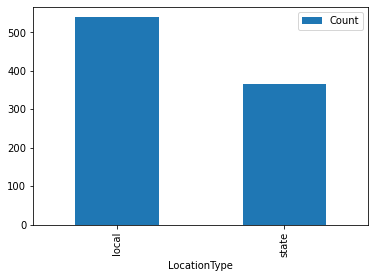

In [28]:
# Now that we have our new dataframe, we can create a bar chart:

# We just need one part of matplotlib, the pyplot module.
# We'll import pyplot and call it "plt" for short.
import matplotlib.pyplot as plt

# Assign the x and y axes to specific columns.
LocationTypeDF.plot(x ='LocationType', y='Count', kind = 'bar')

# Show us the resulting bar chart.
plt.show()

<div class="alert alert-block alert-success">
    <strong>For further exploration:</strong>
    <p>Based on the above, it does seem as though there <em>were</em> a significant number of state-wide Jim Crow statutes passed into law. If we wanted to take this a step further, we could see when these state-wide laws were created: Paschal's research stops with 1920, and the <em>On The Books</em> dataset continues through 1967.</p> 
        <ul>
            <li>So were these laws passed <em>after</em> 1967?</li>
            <li>Has <em>On The Books</em> identified laws as producing or perpetuating Jim Crow that Paschal passed over?</li>
    </ul>
</div>

### Where in North Carolian were Jim Crow laws adopted?

We've identified which laws were applied only to local areas, but what if we wanted to see *which* local areas were subject to Jim Crow laws passed by the North Carolina General Assembly? What if we wanted to map the number of laws passed in specific local areas?

There are a number of ways we could approach these questions. We've already seen how we can use the formulaic language in chapter titles, and we could return to this to classify laws by their location rather than a location *type*. Remember that we've seen at least 3 different types of location specific to smaller geographic areas: town, city, and county. **For this exercise, we're going to look at only 1 location type: county.** 

We'll start with a script that will look similar to the one above that we used to search for location types. This time, however, we'll look only for `county` and `counties` to create a new counties dataframe that we'll use for mapping. 

*This search will exclude mentions of cities, towns, and other smaller local areas. Those laws would need to be identified and mapped separately. So the results we produce here will not include all laws within county boundaries but just those laws applied at the county level, or laws which mention the county name in the chapter title.*

In [29]:
import re

# Create a list of variables to search for.
county = 'county'
counties = 'counties'

# Create a new dataframe, "countiesDF".
# Set the columns in the new dataframe to match those in our main 
# Jim Crow laws dataframe (df).
countiesDF = pd.DataFrame(columns=['VolumeLawTypeChapterSection','IdentifiedBy','ChapterTitle','SectionText','Volume','LawType','ChapterNum.','SectionNum.','LocationType'])

# Go through each row in the original dataframe.
for i,row in df.iterrows():
    
    # Get the chapter title in a specific row.
    chapter = str(df.loc[i,'ChapterTitle'])
    
    # Make the chapter title all lowercase.
    chapter = chapter.lower()

    # Search a ChapterTitle for 'county'.
    if re.search(county, chapter):
        
        # If 'county' was found, add the law to the new countiesDF.
        # If 'county' was NOT found, move on to the next statement.
        countiesDF = countiesDF.append(row, ignore_index=True)
    
    # Search a ChapterTitle for 'counties'.
    elif re.search(counties, chapter):
        
        # If 'counties' was found, add the law to the new countiesDF.
        # If 'counties' was NOT found, move on to the next statement.
        countiesDF = countiesDF.append(row, ignore_index=True)
    
    # If none of the statements above are true (if none of the 
    # variables were found), then skip this law, don't add it
    # to countiesDF, and move on to the next law.
    else:
        
        continue

# OPTIONAL: Remove the # below to save this file as a new .csv.
# countiesDF.to_csv(r'jclaws_dataset_counties.csv', index=False, sep='|')

# Display the first 50 laws in the dataset.
countiesDF.head(51)

,VolumeLawTypeChapterSection,IdentifiedBy,ChapterTitle,SectionText,Volume,LawType,ChapterNum.,SectionNum.,LocationType
0,1879 Public Laws Ch. 276 Sec. 1,xpert,"CHAPTER 276 AN ACT TO AUTHORIZE THE BOARD OF EDUCATION OF BRUNS- WICK, SURRY AND EDGECOMBE COUNTIES TO PAY CERTAIN SCHOOL CLAIMS. The General Asse...","Sec. 1 That the board of education of the counties of Brunswick, Surry and Edgecombe shall at the time required by law for distribution of the pub...",1879,Public Laws,276.0,1.0,local
1,1880 Public Laws Ch. 22 Sec. 1,model and expert,"CHAPTER 22 AN ACT TO AUTHORIZE THE BOARD OF EDUCATION OF EDGE- COMBE COUNTY TO PAY CERTAIN SCHOOL CLAIMS, The General Assembly of North Carolina d...","Sec. 1 That the board of education of Edgecombe, Brunswick, Pender and Washington counties shall at the time prescribed by law for distribution of...",1880,Public Laws,22.0,1.0,local
2,1881 Private Laws Ch. 50 Sec. 6,model,"CHAPTER 50 AN ACT TO INCORPORATE THE CITY OF GOLDSBORO, IN WAYNE COUNTY. The General Assembly of North Carolina do enact :",Sec. 6 Said registrar shall be furnished by said county commissioners with registration books at the expense of the city ; and it shall be the dut...,1881,Private Laws,50.0,6.0,local
3,1881 Public Laws Ch. 189 Sec. 1,model and expert,CHAPTER 189 AN ACT TO ESTABLISH GRADED SCHOOLS IN GOLDSBORO TOWXK- SHIP IN WAYNE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 1 That the board of commissioners of the county of Wayne are hereby authorized to submit to the qualified voters of Goldsboro township, in sa...",1881,Public Laws,189.0,1.0,local
4,1881 Public Laws Ch. 189 Sec. 3,model and expert,CHAPTER 189 AN ACT TO ESTABLISH GRADED SCHOOLS IN GOLDSBORO TOWXK- SHIP IN WAYNE COUNTY. The General Assembly of North Carolina do enact:,Sec. 3 That the special taxes thus levied and collected from the taxable property and polls of white persons shall be expended in keeping up a gra...,1881,Public Laws,189.0,3.0,local
5,1881 Public Laws Ch. 189 Sec. 4,model,CHAPTER 189 AN ACT TO ESTABLISH GRADED SCHOOLS IN GOLDSBORO TOWXK- SHIP IN WAYNE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 4 That E. B. Boyden, J. A. Bonitz, H. L. Grant, H.5, Lee, W. A. Deans, Nathan Bogatt and B. F. Arrington, be and they are hereby constituted ...",1881,Public Laws,189.0,4.0,local
6,1881 Public Laws Ch. 189 Sec. 5,model,CHAPTER 189 AN ACT TO ESTABLISH GRADED SCHOOLS IN GOLDSBORO TOWXK- SHIP IN WAYNE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 5 That Hinton Sugg, Anestus Smith, William Crockett, Hillery Sears, Squire Hodges, Nathan Boyett, (colored,) and C. A. Scott, be and they are...",1881,Public Laws,189.0,5.0,local
7,1881 Public Laws Ch. 189 Sec. 6,model and expert,CHAPTER 189 AN ACT TO ESTABLISH GRADED SCHOOLS IN GOLDSBORO TOWXK- SHIP IN WAYNE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 6 That the public school money which shall, from time to time, be,collected under the general school law for public schoo! purposes for the w...",1881,Public Laws,189.0,6.0,local
8,1881 Public Laws Ch. 189 Sec. 7,model,CHAPTER 189 AN ACT TO ESTABLISH GRADED SCHOOLS IN GOLDSBORO TOWXK- SHIP IN WAYNE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 7 That the public school money which shall, from time to time, be collected under the general school law for public school purposes for the c...",1881,Public Laws,189.0,7.0,local
9,1883 Private Laws Ch. 142 Sec. 6,model,"CHAPTER 142 An act to incorporate the town of Smithfield, in Johnston county. The General Assembly of North Carolina do enact:","Sec. 6 Said registrar shall be furnished by said county commissioners with registration books at the expense of the town, and it shall be the duty...",1883,Private Laws,142.0,6.0,local


**Look through the results above. What do you notice about the laws that have been selected?**

You may have noticed that some chapter titles name towns or townships as well as counties. These laws would have applied only to those specific locations *within* the counties, but we'll include them in our counties dataset because some part of the county would have been subject to those laws.

**Our next step will be to identify the names of specific counties within the counties datatframe.** You might wonder why we didn't start with this step: some North Carolina towns/cities and counties share the same name. For our purposes, it is simpler to pull out only laws that include `COUNTY` in the chapter title. This should minimize instances of locations being misidentified as counties. 

To create this new dataframe and ultimately map it, we'll follow these steps:

1. [*Get a list of county names.*](#1) Today, North Carolina has 100 counties. We're working with [this list of counties maintained by the UNC School of Government's Knapp Library](https://www.sog.unc.edu/resources/microsites/knapp-library/counties-north-carolina). 

    This list accounts only for *current counties*. During the period covered by the *On The Books* dataset, some county names were changed and boundaries shifted. For example, Durham County was carved out of Orange and Wake Counties in 1881. So any laws passed prior to 1881 that would have pertained to the area now known as Durham County will be classified as belonging to Orange or Wake Counties respectively. Further research on those laws and if/how they would have applied to Durham County would need to be done in order to create a more historically accurate spatial dataset. 
 
 
2. [*Create a new dataframe to hold the laws and their associated county names.*](#2) We're doing this because there are instances of chapter titles containing multiple county names, for example: `CHAPTER 330 An act to establish graded schools in the counties of Nash and Edgecombe.`

    This law and others like it will need to be mapped multiple times to ensure that both Nash and Edgecombe counties are represented. Therefore, in our new dataframe, a laws pertaining to multiple counties will be replicated to account for each county listed. This, the section associated with `CHAPTER 330` above will appear once with `Nash` in a new `CountyName` column and once with `Edgecome` in the `CountyName` column. We want to avoid introducing this duplication into our main Jim Crow laws dataframe, which is why we are working in a separate dataframe.


3. [*Use the list of county names to search the chapter title.*](#3) As described above, for each county name found, we'll append the law with it's associated county name(s) to the new dataframe. 


4. [*Count the number of laws per county.*](#4) We'll put this into its own dataframe for mapping.


5. [*Map the number of laws per county.*](#5) We'll use [geopandas](https://geopandas.org/) to create the map and will use a color gradient to indicate the number of laws per county. To do this, we'll need to

    - Import geographic county shapes, or polygons stored in a GIS format called a [shapefile](https://en.wikipedia.org/wiki/Shapefile).
    - Match the county names in our laws-per-county dataframe to the county shapes.
    - Use matplotlib and geopandas to create a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) to show us the number of laws per county in a geographic visualization (map).

### 1. Get a list of county names. <a class="anchor" id="1"></a>

We've provided a [list of county names](NC_counties.txt) that we'll need to pull into Python in order to search for each of them in the chapter titles.

In [30]:
# Instead of searching individual terms as we did for county, town, 
# etc., above, we'll create a list of county names and search the 
# Jim Crow laws dataset for each name in the list.
# The following creates an empty list that we'll fill from a file.
counties_list = []

# Open a text file that contains each county name
# on a separate line. Note that "County" is not included with each name.
with open('NC_counties.txt', 'r') as file:
    
    # For each county name in the file.
    for county in file:
        
        # Remove the invisible escape character at the end of each name.
        county = county.strip('\n')
        
        # Add the county name from the file to our counties_list list.
        counties_list.append(county)

# Display the list, which should now include all 100 counties.
print(counties_list)

['Alamance', 'Alexander', 'Alleghany', 'Anson', 'Ashe', 'Avery', 'Beaufort', 'Bertie', 'Bladen', 'Brunswick', 'Buncombe', 'Burke', 'Cabarrus', 'Caldwell', 'Camden', 'Carteret', 'Caswell', 'Catawba', 'Chatham', 'Cherokee', 'Chowan', 'Clay', 'Cleveland', 'Columbus', 'Craven', 'Cumberland', 'Currituck', 'Dare', 'Davidson', 'Davie', 'Duplin', 'Durham', 'Edgecombe', 'Forsyth', 'Franklin', 'Gaston', 'Gates', 'Graham', 'Granville', 'Greene', 'Guilford', 'Halifax', 'Harnett', 'Haywood', 'Henderson', 'Hertford', 'Hoke', 'Hyde', 'Iredell', 'Jackson', 'Johnston', 'Jones', 'Lee', 'Lenoir', 'Lincoln', 'McDowell', 'Macon', 'Madison', 'Martin', 'Mecklenburg', 'Mitchell', 'Montgomery', 'Moore', 'Nash', 'New Hanover', 'Northampton', 'Onslow', 'Orange', 'Pamlico', 'Pasquotank', 'Pender', 'Perquimans', 'Person', 'Pitt', 'Polk', 'Randolph', 'Richmond', 'Robeson', 'Rockingham', 'Rowan', 'Rutherford', 'Sampson', 'Scotland', 'Stanly', 'Stokes', 'Surry', 'Swain', 'Transylvania', 'Tyrrell', 'Union', 'Vance', '

### 2. Create a new dataframe to hold the laws and their associated county names. <a class="anchor" id="2"></a>

This is an important step to complete because we will need to make some changes to the data structure--add rows for laws that are applied to multiple counties, and add another column. We don't want to alter our initial dataset, and we only need to work with the laws that we've already filtered into the `countiesDF` dataframe.

In [31]:
# Create a new, empty dataframe. 
# Note that we are excluding some of the columns that we're not
# working with to simplify the dataframe. 
# There may be reasons you would want to include them, for example,
# to map which types of laws (public or private) are pass where.
geoDF = pd.DataFrame(columns=['ChapterTitle','SectionText','Volume','ChapterNum.','SectionNum.','CountyName'])

# Display the column names and empty dataframe.
geoDF.head()

,ChapterTitle,SectionText,Volume,ChapterNum.,SectionNum.,CountyName


### 3. Use the list of county names to search chapter titles. <a class="anchor" id="3"></a>

We'll now use our `counties_list` to search Chapter Titles in `countiesDF` for county names and add those laws to the new `geoDF` with county names included in the `CountyName` column. Laws that include multiple county names will be replicated for each county name--so if 2 counties are named in one law's Chapter Title, that law will appear twice, once for each of the county names.

It may take a few minutes for Python and Binder to complete this task. Remember that there are 100 counties in North Carolina, and we're asking Python to read through the `countiesDF` for each county (100 times).

In [32]:
# For each county in the counties list.
for county in counties_list:
    
    # Make the county name all lowercase.
    county = county.lower()
    
    # Go through each row in countiesDF.
    for i,row in countiesDF.iterrows():
        
        # Get the chapter title in the specific row.
        chapter = str(countiesDF.loc[i,'ChapterTitle'])
    
        # Make the chapter title all lowercase.
        chapter = chapter.lower()
        
        # If the county name is found in the chapter title...
        if re.search(county,chapter):
            
            # Create a new row to add to the geoDF. 
            # Remember that we're only pulling in certain columns.
            # This line will help us get and restructure each 
            # law's contents to fit these columns.
            # Note that the very last column, County, pulls in the
            # county name from counties_list.
            newRow = {'ChapterTitle':countiesDF.loc[i,'ChapterTitle'], 'SectionText':countiesDF.loc[i,'SectionText'], 'Volume':countiesDF.loc[i,'Volume'], 'ChapterNum.':countiesDF.loc[i,'ChapterNum.'], 'SectionNum.':countiesDF.loc[i,'SectionNum.'], 'CountyName':str(county)}     
        
            # Add the new row to the years dataframe.
            geoDF = geoDF.append(newRow, ignore_index=True)

        # If the county name is NOT found, move on to the next county name.    
        else:
            continue 

# Display a preview of the new dataframe.
geoDF.head(51)

,ChapterTitle,SectionText,Volume,ChapterNum.,SectionNum.,CountyName
0,"CHAPTER 187 AN ACT TO PROVIDE FOR THE PUBLIC SCHOOLS IN THE CITY OF BURLINGTON, ALAMANCE COUNTY. The General Assembly of North Carolina do enact:",Sec. 2 That the said city of Burlington shall be and constitute one school district for the white race and one school district for the colored race.,1901,187.0,2.0,alamance
1,"CHAPTER 97 AN ACT TO ESTABLISH AND MAINTAIN A GRADED SCHOOL IN THE TOWN OF GRAHAM, ALAMANCE COUNTY, NORTH CAROLINA. The General Assembly of North ...","Sec. 5 The following parties are hereby constituted and appointed the school trustees for the school district hereinbefore created: H. W. Scott, J...",1903,97.0,5.0,alamance
2,CHAPTER 161 AN ACT TO ESTABLISH A GRADED SCHOOL IN CERTAIN SPECIFIC TERRITORY IN ALAMANCE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 3 That said board of trustees shall, on the first Monday in May next ensuing, submit to the qualified voters of said district above created t...",1903,161.0,3.0,alamance
3,"CHAPTER 185 AN ACT TO INCORPORATE THE ELON GRADED SCHOOL DISTRICT FOR THE WHITE RACE IN BOON STATION TOWNSHIP, ALAMANCE COUNTY, NORTH CAROLINA. Th...","Sec. 1 That all the territory embraced in Elon Special-tax District, Number Two, for white race, in Boon Station Township, Alamance County, North ...",1913,185.0,1.0,alamance
4,CHAPTER 244 AN ACT TO ESTABLISH A GRADED SCHOOL IN CERTAIN SPECIFIC TERRITORY IN ALAMANCE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 3 That said Board of Trustees shall, on the first Monday in May next ensuing, submit to the qualified voters of said district above created t...",1903,244.0,3.0,alamance
5,CHAPTER 263 AN ACT TO ESTABLISH A GRADED SCHOOL IN CERTAIN SPECIFIC TERRITORY IN ALAMANCE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 3 That said Board of Trustees shall, on the first Monday in May next ensuing, submit to the qualified voters of said district above created t...",1903,263.0,3.0,alamance
6,CHAPTER 321 AN ACT TO CREATE A GRADED SCHOOL IN CERTAIN SPECIFIC TERRITORY IN ALAMANCE COUNTY. The General Assembly of North Carolina do enact:,"Sec. 3 That the said Board of Trustees shall, on the first Monday in May next ensuing, submit to the qualified voters of said district above creat...",1903,321.0,3.0,alamance
7,CHAPTER 301 An act to amend the charter of the town of Asheboro in Randolph county. The General Assembly of North Carolina do enact:,Sec. 10 That it shall be the duty of said board of school commissioners to establish a public school for white children and one for the colored ch...,1893,301.0,10.0,ashe
8,"CHAPTER 278 AN ACT TO ESTABLISH GRADED SCHOOLS IN THE TOWN OF BEAUFORT, CARTERET COUNTY. The General Assembly of North Carolina do enact:","Sec. 1 That all the territory embraced within the corporate limits of the town of Beaufort, and also all the territory embraced and included as it...",1905,278.0,1.0,beaufort
9,"CHAPTER 278 AN ACT TO ESTABLISH GRADED SCHOOLS IN THE TOWN OF BEAUFORT, CARTERET COUNTY. The General Assembly of North Carolina do enact:",Sec. 6 That it shall be the duty of said board of trustees to establish graded public schools for the white and colored children of the said Beauf...,1905,278.0,6.0,beaufort


*Read through some of the chapter titles above. Have their county names been identified correctly?* 

### 4. Count the number of laws per county. <a class="anchor" id="4"></a>

Our new `geoDF` is great, but let's zoom out to get a bigger picture by counting the number of laws per county.

In [33]:
# Count the number of laws identified per county.
geoCounts = geoDF['CountyName'].value_counts()

# Create a new dataframe to hold the number of laws (count) per county.
geoCountsDF = pd.DataFrame(geoCounts)

# Set the row numbers (index) for the new dataframe.
geoCountsDF = geoCountsDF.reset_index()

# Create the column names for the IdentifiedBy dataframe.
geoCountsDF.columns = ['CountyName', 'Count']

# OPTIONAL: Remove the # from the line below to sort the geoCountsDF by county name.
#geoCountsDF = geoCountsDF.sort_values(by='CountyName')

# Remove the maximum limit on number of rows to display
# so that we can see the full dataframe.
pd.set_option('display.max_rows', None)

# Display a preview of the number of laws per county.
# Note that we should see the number of rows at the bottom
# of the output below -- this will let us know how
# many of the counties have been identified.
display(geoCountsDF)

,CountyName,Count
0,robeson,26
1,cherokee,15
2,union,14
3,cumberland,10
4,person,10
5,columbus,10
6,wilson,10
7,carteret,9
8,wayne,9
9,lenoir,9


The above table is great, but not all 100 counties appear because some were not identified in chapter titles. For mapping purposes, we may want to be able to produce a map that explicitly labels each county and the number of Jim Crow laws associated with it, even if that number if 0. To do this, we need to create a dataframe that includes both the counts above and the counties with 0 counts. 

In the following scripts, we'll create a second dataframe, `geoCountsAllDF` that we'll compare with the original `geoCountsDF` and use to create a complete dataframe. As you read, observe carefully which dataframe is being invoked when and how it's being used.

In [34]:
# Create a new dataframe to hold the number of laws (count) per county
# as well as ALL counties for whom the count is 0.
geoCountsAllDF = pd.DataFrame(columns=['CountyName','Count'])

# We'll go back to the original counties_list and add
# each county name to geoCountsAllDF.
for county in counties_list:
    
    # Make the county name all lowercase.
    county = county.lower()

    # Create a new row to add to geoCountsAllDF. 
    # This row will include the county name and a count of 0.
    # We'll add the values from geoCountsDF in next.
    newRow = {'CountyName':county, 'Count':0}     

    # Add the new row to the years dataframe.
    geoCountsAllDF = geoCountsAllDF.append(newRow, ignore_index=True)

geoCountsAllDF

,CountyName,Count
0,alamance,0
1,alexander,0
2,alleghany,0
3,anson,0
4,ashe,0
5,avery,0
6,beaufort,0
7,bertie,0
8,bladen,0
9,brunswick,0


Now that we have all of our counties in a dataframe, let's check `geoCountsDF` against `geoCountsAllDF`. Whenever we find a count value greater than 0 for a given county in `geoCountsDF`, we'll replace the corresponding county's `Count` value in `geoCountsAllDF`. This should give us a more complete dataframe that includes all county names and values, including 0 values.

In [35]:
# Go through each row in geoCountsAllDF 
# (the dataframe of all 100 counties with 0 Counts).
for i,row in geoCountsAllDF.iterrows():

    # Get the county name in the specific row.
    countyName = str(geoCountsAllDF.loc[i,'CountyName'])

    # Go through each row in geoCountsDF
    # (the dataframe of only counties with Jim Crow laws
    # identified in chapter titles).
    for k,row in geoCountsDF.iterrows():
    
        # If the county name in geoCountsAllDF is present in geoCountsDF,
        # move to the next if statement below, otherwise, continue to the
        # else statement.
        if countyName in geoCountsDF.loc[k,'CountyName']:
            
            # If the corresponding county name's Count in geoCountsDF is greater
            # than the Count value in geoCountsAllDF (0)...
            if geoCountsDF.loc[k,'Count'] > geoCountsAllDF.loc[i,'Count']:
                
                # Replace the value (0) in the geoCountsAllDF Count column
                # with the value (non-zero) in geoCountsDF.
                geoCountsAllDF.at[i,'Count'] = geoCountsDF.loc[k,'Count']
        
        # If the county name in geoCountsAllDF if NOT present in geoCountsDF,
        # continue on to the next county name in geoCountsAllDF. The
        # count value will remain at 0. This is an important step for ensuring
        # that counties with 0 identified laws are included in our final
        # dataframe of all counties.
        else:
            
            continue

# OPTIONAL: Remove the # from the line below to sort the geoCountsAllDF by Count.
#geoCountsAllDF = geoCountsAllDF.sort_values(by='Count')

# Display the final dataframe that includes all 100 county names and the number
# of Jim Crow laws identified in that county.
geoCountsAllDF

,CountyName,Count
0,alamance,7
1,alexander,0
2,alleghany,0
3,anson,0
4,ashe,1
5,avery,0
6,beaufort,6
7,bertie,4
8,bladen,5
9,brunswick,0


Now that we have a dataset that include *all* county names and *all* values, including 0, we can move forward with our spatial analysis:

Another way we can get a sense of how many Jim Crow laws were identified per county is by visualizing them. We can do this as we've done previously with a simple bar graph:

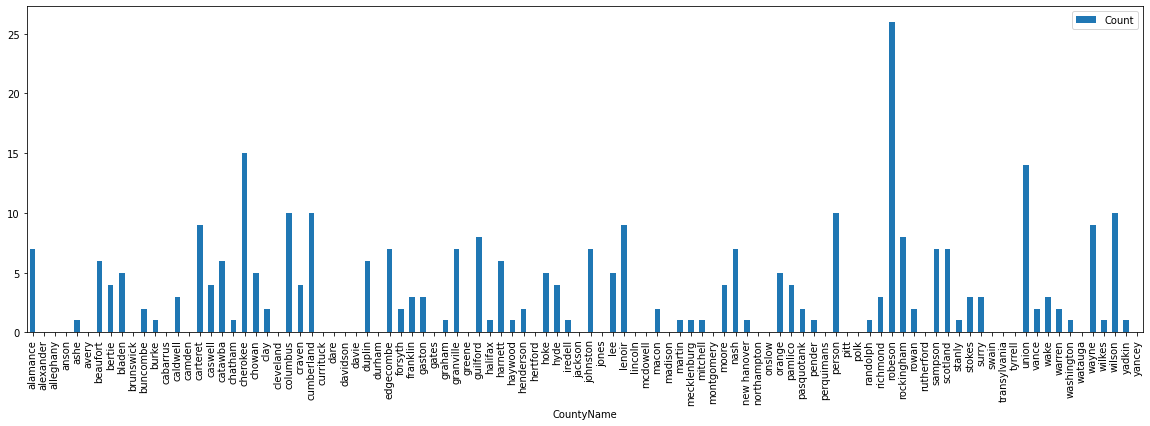

In [36]:
# Just in case, we'll reimport matplot lib's pyplot module.
import matplotlib.pyplot as plt

# OPTIONAL: Remove the # from the line below to sort the geoCountsAllDF by Count.
#geoCountsAllDF = geoCountsAllDF.sort_values(by='Count')

# Assign the x and y axes to specific columns.
geoCountsAllDF.plot(x ='CountyName', y='Count', kind = 'bar', figsize=(20, 6))

# Show us the resulting bar chart.
plt.show()

What can this bar graph tell us? What can it *not* tell us?

### 5. Map the number of laws per county. <a class="anchor" id="5"></a>

To answer that last question--what can the bar graph *not* show us--we can create a map that will show us the number of laws per county geographically. As a reminder, here are the steps we'll need to go through to create this map:

 - Import geographic county shapes, or polygons stored in a GIS format called a [shapefile](https://en.wikipedia.org/wiki/Shapefile).
 - Match the county names in our laws-per-county dataframe to the county shapes.
 - Use matplotlib and geopandas to create a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map) to show us the number of laws per county in a geographic visualization (map).

To **import county shapes**, we'll pull the data we need from the North Carolina Department of Transportation, which [maintains geographic data such as county boundaries for public use](https://connect.ncdot.gov/resources/gis/Pages/GIS-Data-Layers.aspx). We'll use a script similar to the one we used to pull the Jim Crow corpus from the Carolina Digital Repository in the [last module.](05-StructuringOCRData.ipynb)

In [37]:
# Requests helps us call up a webpage, or link to a file stored online,
# and access the content.
import requests

# Create a variable to hold the direct link to the county boundaries shapefile.
url = 'https://xfer.services.ncdot.gov/gisdot/DistDOTData-Current/State/shpe/CountyBoundary.zip'

# Here's where we use the requests module to call up
# the content at the url we specified above.
r = requests.get(url)

# We'll create a new empty .zip file to hold the contents of the shapefile.
with open('CountyBoundary.zip', 'wb') as f:
    
    # Write the contents of the online file into the new file.
    f.write(r.content)

# When finished, print the following:
print('GIS files downloaded.')

GIS files downloaded.


Click the Jupyter icon at the top of your browser window to access the files accompanying this module. See if htere is now a `CountyBoundary.zip` file located there. You can also click on [county boundaries here](CountyBoundary.zip) to open the file on your local computer. If you do this and extract the .zip file, you should find a folder that looks like the image below: a folder containing a number of different files all with the same file name but with different file extensions. There is one `.shp`, or shapefile, and the other files are basically supporting files--we need all of them in order to access the county boundaries. In Binder, we'll keep the shapefiles compressed in `CountyBoundary.zip` to ensure we do not make any changes to these files.

<img src="images/10-explore-15.jpg" width="70%" style="margin:20px; box-shadow: 25px 25px 20px -30px rgba(0, 0, 0);" alt="The uncompressed CountyBoundary.zip file showing the .shp and accompanying files that make up a shapefile." title="The uncompressed CountyBoundary.zip file showing the .shp and accompanying files that make up a shapefile."/>

Let's take a look at these county shapes to see what we have.

First, we need to install the Geopandas Python library, which we haven't yet used. Run the following command to install and wait for it to complete before running the next script. It may take a moment, so be patient. The mapping scripts below will not work without it.

In [38]:
!pip install geopandas

In [39]:
# We'll need the following modules to access and view the county boundaries.

# Pandas, which we've been working with above, helps us view and organize data.
import pandas as pd

# Geopandas is an extension of Pandas, which helps us work with geospatial data.
import geopandas as gpd

# Shapely helps us work with and display geospatial objects. 
# (Points, lines, polygons.) Geopandas relies on Shapely.
from shapely.geometry import Point

# Geopandas also needs matplotlib to display visualizations.
import matplotlib.pyplot as plt

print('Libraries successfully imported.')

Libraries successfully imported.


In [40]:
# Now let's pull in the geographic data.

# Open and read the county boundaries shapefile.
countyShapes = gpd.read_file('zip://CountyBoundary.zip!CountyBoundary_SHP/BoundaryCountyPolygon.shp')

# Display a preview of the county boundaries data.
countyShapes

,FIPS,CountyName,UpperCount,SapCountyI,DOTDistric,DOTDivisio,SAP_CNTY_N,CNTY_NBR,DSTRCT_NBR,DIV_NBR,NAME,Shape_STAr,Shape_STLe,geometry
0,29,Camden,CAMDEN,015,1,1,15,14,1,1,Camden,8.650426e+09,6.804507e+05,"POLYGON ((2913995.553 864401.707, 2913895.042 864404.426, 2913794.530 864407.144, 2913694.018 864409.863, 2913593.506 864412.581, 2913492.994 8644..."
1,73,Gates,GATES,037,1,1,37,36,1,1,Gates,9.640705e+09,4.446044e+05,"POLYGON ((2678789.043 934597.313, 2678741.557 934696.666, 2678694.071 934796.018, 2678646.585 934895.370, 2678599.100 934994.722, 2678551.614 9350..."
2,97,Iredell,IREDELL,049,3,12,49,48,3,12,Iredell,1.667062e+10,6.396321e+05,"POLYGON ((1420151.569 639374.887, 1420082.675 639448.945, 1420013.782 639523.004, 1419944.886 639597.068, 1419875.992 639671.126, 1419807.099 6397..."
3,193,Wilkes,WILKES,097,2,11,97,96,2,11,Wilkes,2.111175e+10,7.182091e+05,"POLYGON ((1319004.883 828579.516, 1318921.263 828603.475, 1318725.878 828641.415, 1318667.879 828638.315, 1318598.878 828623.915, 1318471.878 8285..."
4,179,Union,UNION,090,3,10,90,89,3,10,Union,1.782795e+10,5.844499e+05,"POLYGON ((1536924.570 534391.626, 1537009.088 534337.047, 1537093.608 534282.465, 1537178.129 534227.884, 1537262.649 534173.302, 1537347.169 5341..."
5,25,Cabarrus,CABARRUS,013,1,10,13,12,1,10,Cabarrus,1.014364e+10,4.388254e+05,"POLYGON ((1536924.570 534391.626, 1536842.078 534454.484, 1536759.586 534517.343, 1536677.095 534580.201, 1536594.603 534643.060, 1536512.112 5347..."
6,183,Wake,WAKE,092,1,5,92,91,1,5,Wake,2.388831e+10,7.020263e+05,"POLYGON ((2027829.589 770896.592, 2027935.417 770894.847, 2028041.246 770893.102, 2028147.074 770891.357, 2028252.902 770889.612, 2028358.730 7708..."
7,69,Franklin,FRANKLIN,035,3,5,35,34,3,5,Franklin,1.378725e+10,5.860711e+05,"POLYGON ((2220576.740 753518.968, 2220592.246 753592.019, 2220620.595 753698.005, 2220603.262 753731.332, 2220591.384 753774.690, 2220582.376 7538..."
8,141,Pender,PENDER,071,1,3,71,70,1,3,Pender,2.458924e+10,8.306639e+05,"POLYGON ((2296859.147 358861.277, 2296918.479 358830.027, 2296976.249 358847.215, 2297026.212 358847.215, 2297063.685 358815.965, 2297088.667 3587..."
9,129,New Hanover,NEW HANOVER,065,3,3,65,64,3,3,New Hanover,6.140590e+09,5.145329e+05,"POLYGON ((2389472.737 201963.033, 2389427.113 201865.777, 2389381.489 201768.522, 2389335.866 201671.267, 2389290.242 201574.012, 2389244.619 2014..."


You might have been expecting to see the shapes of county boundaries themselves, and we will see that. But first, it's important to understand that geographic data can also be accessed in a tabular format. *Take a look at all of the columns. What might they represent?*

The columns we'll be working with for this exercise are `CountyName` and `geometry`. We can ignore the other columns for now.

OK, *now* we'll see what the county shapes, defined in the `geometry` column, actually look like.

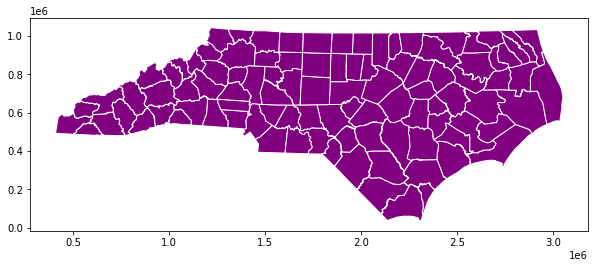

In [41]:
# Use matplotlib to preview the county boundaries.
# "color" is the color that will "fill" the counties.
# "edgecolor" is the county boundaries', or outlines', color.
countyShapes.plot(color='purple', edgecolor='white', figsize=(10,10));

Now that we have our counties, let's **match the county names in our laws-per-county dataframe to the county shapes we just downloaded.** Essentially, we're joining two separate datasets using county names, which should be the same between the two datasets. 

In [42]:
# First, let's create a Pandas dataframe for countyShapes.
countyShapesDF = pd.DataFrame(countyShapes)

# For each row in countyShapesDF, do the following:
for i,row in countyShapesDF.iterrows():
    
    # Locate the county name in that row's CountyName column.
    county = countyShapesDF.loc[i,'CountyName']
    
    # At the same location as above,
    # change the county name to all lowercase. 
    # This will ensure that the county name in countyShapesDF
    # and the county name in geoCountsDF (our number of
    # laws-per-county dataframe) match exactly before we try
    # to combine dataframes. This process is case sensitive!
    countyShapesDF.at[i,'CountyName'] = county.lower()

# Now that all CountyNames are lower case,
# we'll join geoCountsDF and countyShapesDF.
# The below line tells Python to look for the
# county names that match in each dataframe
# and use those matching names to combine rows.
mergedGeoDF = geoCountsAllDF.merge(countyShapesDF, left_on=['CountyName'], right_on=['CountyName'])

# Display a preview of the new combined dataframe.
mergedGeoDF

,CountyName,Count,FIPS,UpperCount,SapCountyI,DOTDistric,DOTDivisio,SAP_CNTY_N,CNTY_NBR,DSTRCT_NBR,DIV_NBR,NAME,Shape_STAr,Shape_STLe,geometry
0,alamance,7,1,ALAMANCE,001,3,7,1,0,3,7,Alamance,1.210719e+10,4.766909e+05,"POLYGON ((1923605.182 881799.472, 1923342.027 867725.564, 1923409.239 867756.832, 1923491.769 867644.162, 1923452.909 867597.552, 1923452.909 8675..."
1,alexander,0,3,ALEXANDER,002,3,12,2,1,3,12,Alexander,7.343464e+09,3.873423e+05,"POLYGON ((1374327.813 744224.794, 1374263.717 744310.778, 1374199.621 744396.763, 1374135.525 744482.747, 1374071.428 744568.732, 1374007.332 7446..."
2,alleghany,0,5,ALLEGHANY,003,1,11,3,2,1,11,Alleghany,6.576362e+09,4.391667e+05,"POLYGON ((1336458.513 959890.137, 1336579.904 959986.103, 1336668.896 960066.893, 1336757.888 960147.684, 1336786.595 960178.032, 1336806.279 9602..."
3,anson,0,7,ANSON,004,3,10,4,3,3,10,Anson,1.497020e+10,5.755038e+05,"POLYGON ((1618559.891 528612.782, 1618623.896 528628.949, 1618683.786 528652.344, 1618768.944 528680.420, 1618827.901 528701.007, 1618889.569 5287..."
4,ashe,1,9,ASHE,005,2,11,5,4,2,11,Ashe,1.193919e+10,5.200454e+05,"POLYGON ((1269410.489 915476.459, 1266824.424 915907.423, 1262062.569 919307.586, 1258473.809 921813.045, 1256527.960 921292.332, 1253404.490 9251..."
5,avery,0,11,AVERY,006,2,11,6,5,2,11,Avery,6.899848e+09,4.316700e+05,"POLYGON ((1117102.999 799894.038, 1117025.331 799958.708, 1116947.663 800023.378, 1116869.994 800088.049, 1116792.326 800152.719, 1116714.657 8002..."
6,beaufort,6,13,BEAUFORT,007,1,2,7,6,1,2,Beaufort,2.685961e+10,8.899154e+05,"POLYGON ((2541888.070 726631.611, 2541951.881 726732.711, 2542015.692 726833.812, 2542060.005 726929.590, 2542104.317 727025.369, 2542175.220 7271..."
7,bertie,4,15,BERTIE,008,2,1,8,7,2,1,Bertie,2.066503e+10,8.296786e+05,"POLYGON ((2663467.371 777199.364, 2663324.223 777172.926, 2663181.076 777146.486, 2663083.521 777110.932, 2662985.966 777075.376, 2662847.768 7770..."
8,bladen,5,17,BLADEN,009,3,6,9,8,3,6,Bladen,2.474152e+10,8.722529e+05,"POLYGON ((2224454.097 293258.541, 2224416.435 293163.941, 2224382.120 293107.849, 2224338.020 293060.404, 2224262.672 292966.167, 2224160.325 2928..."
9,brunswick,0,19,BRUNSWICK,010,3,3,10,9,3,3,Brunswick,2.491489e+10,8.800443e+05,"POLYGON ((2292969.650 213178.458, 2293075.049 213124.962, 2293180.449 213071.466, 2293285.848 213017.971, 2293391.248 212964.476, 2293472.716 2129..."


*Examine this new dataframe. What do you notice? How have our two dataframes been combined?* 

Note that there is only **1** `CountyName` column in the merged data, and the `Count` column from `geoCountsDF` has been added before the other columns from the `countyShapesDF`. We really only need `CountyName`, `Count`, and `geometry` to create a map, but we'll leave these other columns in.

**Now we have our final dataset that we can use to map the number of Jim Crow laws per county.** We're going to create a [choropleth map](https://en.wikipedia.org/wiki/Choropleth_map), a map whose colors, or in this case color hues, represent a quantity--in this case, number of laws identified for a given county. A common practice in these kinds of maps is to make darker tones correspond with larger quantities.

Let's see how this works with Geopandas.

In [43]:
# Now we need to convert our Pandas dataframe
# into a Geopandas dataframe. When we preview the
# dataframe below, we won't see a difference, but
# Python will because it now knows where to find
# the geographic coordinates for our county boundaries--
# in the geometry column.
mergedGeoDF = gpd.GeoDataFrame(mergedGeoDF, geometry='geometry')

# Display a preview of our new Geopandas dataframe.
mergedGeoDF

,CountyName,Count,FIPS,UpperCount,SapCountyI,DOTDistric,DOTDivisio,SAP_CNTY_N,CNTY_NBR,DSTRCT_NBR,DIV_NBR,NAME,Shape_STAr,Shape_STLe,geometry
0,alamance,7,1,ALAMANCE,001,3,7,1,0,3,7,Alamance,1.210719e+10,4.766909e+05,"POLYGON ((1923605.182 881799.472, 1923342.027 867725.564, 1923409.239 867756.832, 1923491.769 867644.162, 1923452.909 867597.552, 1923452.909 8675..."
1,alexander,0,3,ALEXANDER,002,3,12,2,1,3,12,Alexander,7.343464e+09,3.873423e+05,"POLYGON ((1374327.813 744224.794, 1374263.717 744310.778, 1374199.621 744396.763, 1374135.525 744482.747, 1374071.428 744568.732, 1374007.332 7446..."
2,alleghany,0,5,ALLEGHANY,003,1,11,3,2,1,11,Alleghany,6.576362e+09,4.391667e+05,"POLYGON ((1336458.513 959890.137, 1336579.904 959986.103, 1336668.896 960066.893, 1336757.888 960147.684, 1336786.595 960178.032, 1336806.279 9602..."
3,anson,0,7,ANSON,004,3,10,4,3,3,10,Anson,1.497020e+10,5.755038e+05,"POLYGON ((1618559.891 528612.782, 1618623.896 528628.949, 1618683.786 528652.344, 1618768.944 528680.420, 1618827.901 528701.007, 1618889.569 5287..."
4,ashe,1,9,ASHE,005,2,11,5,4,2,11,Ashe,1.193919e+10,5.200454e+05,"POLYGON ((1269410.489 915476.459, 1266824.424 915907.423, 1262062.569 919307.586, 1258473.809 921813.045, 1256527.960 921292.332, 1253404.490 9251..."
5,avery,0,11,AVERY,006,2,11,6,5,2,11,Avery,6.899848e+09,4.316700e+05,"POLYGON ((1117102.999 799894.038, 1117025.331 799958.708, 1116947.663 800023.378, 1116869.994 800088.049, 1116792.326 800152.719, 1116714.657 8002..."
6,beaufort,6,13,BEAUFORT,007,1,2,7,6,1,2,Beaufort,2.685961e+10,8.899154e+05,"POLYGON ((2541888.070 726631.611, 2541951.881 726732.711, 2542015.692 726833.812, 2542060.005 726929.590, 2542104.317 727025.369, 2542175.220 7271..."
7,bertie,4,15,BERTIE,008,2,1,8,7,2,1,Bertie,2.066503e+10,8.296786e+05,"POLYGON ((2663467.371 777199.364, 2663324.223 777172.926, 2663181.076 777146.486, 2663083.521 777110.932, 2662985.966 777075.376, 2662847.768 7770..."
8,bladen,5,17,BLADEN,009,3,6,9,8,3,6,Bladen,2.474152e+10,8.722529e+05,"POLYGON ((2224454.097 293258.541, 2224416.435 293163.941, 2224382.120 293107.849, 2224338.020 293060.404, 2224262.672 292966.167, 2224160.325 2928..."
9,brunswick,0,19,BRUNSWICK,010,3,3,10,9,3,3,Brunswick,2.491489e+10,8.800443e+05,"POLYGON ((2292969.650 213178.458, 2293075.049 213124.962, 2293180.449 213071.466, 2293285.848 213017.971, 2293391.248 212964.476, 2293472.716 2129..."


Now, we can create our map:

<AxesSubplot:title={'center':'Number of Jim Crow Laws per County in North Carolina (1866-1967)'}>

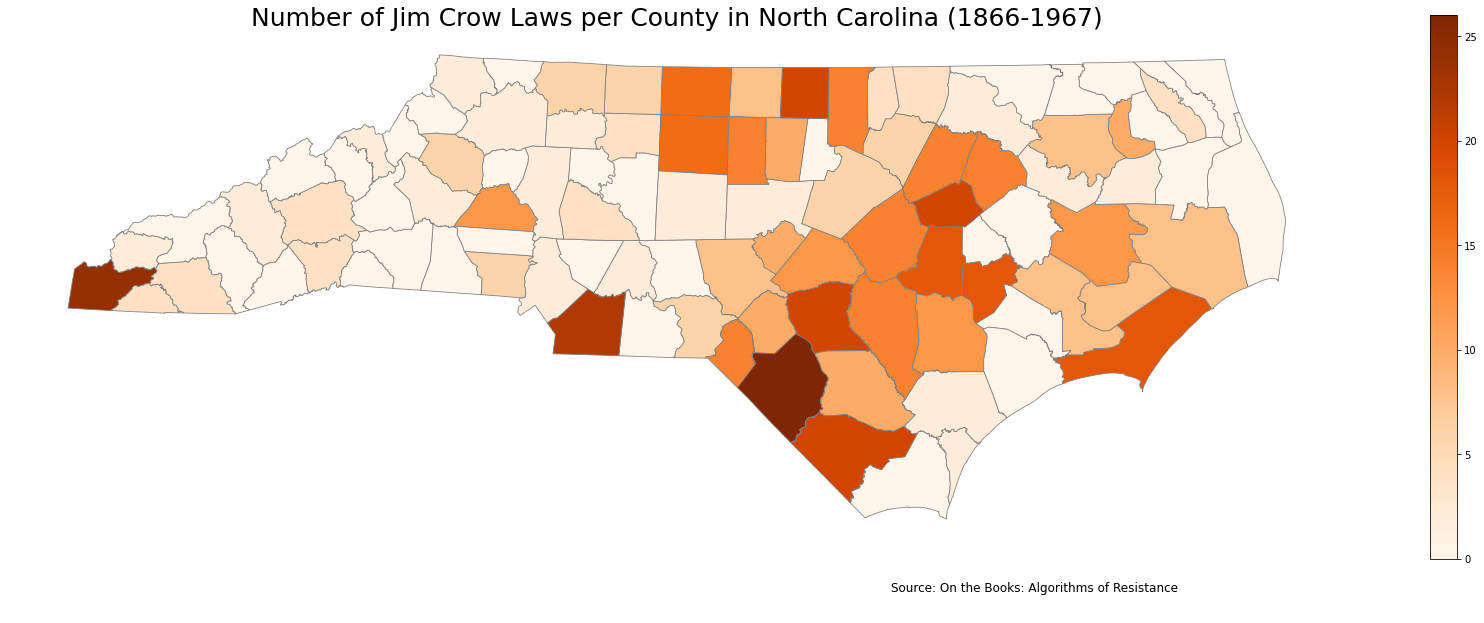

In [69]:
# https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630

# Set the column that will determine color value
# for each county.
countVariable = 'Count'

# Set a range of color values. Note that
# max here is set to match the largest number
# of laws per county.
vmin, vmax = 0, 26

# Create the Matplotlib figure box and axes.
# This step lets us include multiple layers of
# information inside the same visualization.
fig, ax = plt.subplots(1, figsize=(30, 10))

# Turn off the axis. We don't need to see
# the X and Y axes to read this map.
ax.set_axis_off()

# Add a title and source information to the map.
# If we save this as an image later, we want to know
# what we're showing and where your data came from.

# Set the title and font size and weight.
ax.set_title('Number of Jim Crow Laws per County in North Carolina (1866-1967)', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# Add a source citation and set font size. The xy coordinates here 
# specify where to place the source information in the visualization.
ax.annotate('Source: On the Books: Algorithms of Resistance', 
            xy=(0.6, .05), xycoords='figure fraction', fontsize=12)

# Add the sliding scale legend (color bar) and set its colors to
# match those of the states.
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)

# Create the map. 
# Column tells Python where to find our quantitative data
# Cmap sets the color scheme: https://matplotlib.org/2.0.2/users/colormaps.html
# Linewidth sets the width of the county boundaries.
# Ax pulls in the settings above--including turning of the axes and
# adding a title and source information.
# Edgecolor sets the county boundaries color from between 0 (black)
# to 1 (white).
mergedGeoDF.plot(column=countVariable, 
                 cmap='Oranges', 
                 linewidth=0.8, 
                 ax=ax, 
                 edgecolor='0.5')

*Consider our map: what does it tell you? What does it not tell you?*

If you're familiar with North Carolina, it might be easy to read this map: you know which counties are where and have some cultural knowledge about the make up of these counties. If you're less familiar with North Carolina, this map may provide limited meaning. In both cases, it may be difficult to compare the legend to the color of each county. 

To make the map a little more explicit, we can add labels. This process requires that we find the center (centroid) of each county so that we can tell Python where to place each label in relation to its county. The following is the same code as we used above with the addition of several lines to create the labels before producing the final visualization:

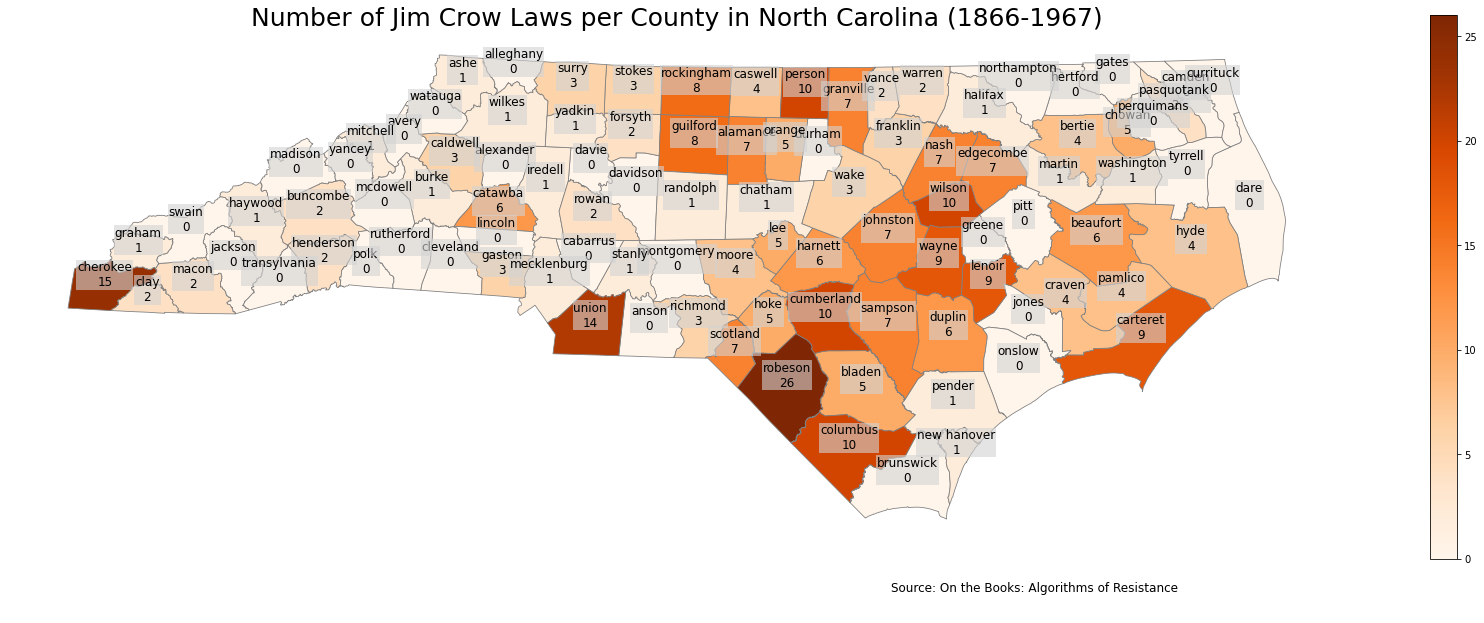

In [111]:
# https://towardsdatascience.com/a-beginners-guide-to-create-a-cloropleth-map-in-python-using-geopandas-and-matplotlib-9cc4175ab630

# Set the column that will determine color value
# for each county.
countVariable = 'Count'

# Set a range of color values. Note that
# max here is set to match the largest number
# of laws per county.
vmin, vmax = 0, 26

# Create the Matplotlib figure box and axes.
# This step lets us include multiple layers of
# information inside the same visualization.
fig, ax = plt.subplots(1, figsize=(30, 10))

# Turn off the axis. We don't need to see
# the X and Y axes to read this map.
ax.set_axis_off()

# Add a title and source information to the map.
# If we save this as an image later, we want to know
# what we're showing and where your data came from.

# Set the title and font size and weight.
ax.set_title('Number of Jim Crow Laws per County in North Carolina (1866-1967)', 
             fontdict={'fontsize': '25', 'fontweight' : '3'})

# Add a source citation and set font size. The xy coordinates here 
# specify where to place the source information in the visualization.
ax.annotate('Source: On the Books: Algorithms of Resistance', 
            xy=(0.6, .05), xycoords='figure fraction', fontsize=12)

# Add the sliding scale legend (color bar) and set its colors to
# match those of the states.
sm = plt.cm.ScalarMappable(cmap='Oranges', norm=plt.Normalize(vmin=vmin, vmax=vmax))
fig.colorbar(sm)

# Create the map. 
# Column tells Python where to find our quantitative data
# Cmap sets the color scheme: https://matplotlib.org/2.0.2/users/colormaps.html
# Linewidth sets the width of the county boundaries.
# Ax pulls in the settings above--including turning of the axes and
# adding a title and source information.
# Edgecolor sets the county boundaries color from between 0 (black)
# to 1 (white).
mergedGeoDF.plot(column=countVariable, 
                 cmap='Oranges', 
                 linewidth=0.8, 
                 ax=ax, 
                 edgecolor='0.5')

# We want to create a label that includes both the county name and the
# number of identified Jim Crow laws. To do this, we need to create a
# column in our dataframe that will hold each county's label.

# First, we'll create an empty list that will hold the labels.
labels = []

# Next we'll go through each row to get the county name and count
# and create a label.
for i,row in mergedGeoDF.iterrows():
    
    # We'll concatenate (combine) the specific county name and its count
    # to create a label. We'll separate these with an escape character "\n",
    # which will display the count on a separate line from the county name.
    label = str(mergedGeoDF.loc[i, 'CountyName']) + "\n" + str(mergedGeoDF.loc[i, 'Count'])
    
    # We'll add the label we just made to the labels list.
    labels.append(label)

# We'll convert the completed list of labels into a new column in mergedGeoDF.
mergedGeoDF['Label'] = labels

# Now we'll apply those labels to the map. 
mergedGeoDF.apply(lambda x: ax.annotate(text=x.Label, xy=x.geometry.centroid.coords[0], ha='center', size=12, bbox={'facecolor': 'lightgrey', 'alpha':0.6, 'pad': 1, 'edgecolor':'none'}),axis=1);

The final line that applies labels is complex, so we'll break it down here:

`mergedGeoDF.apply(lambda x: ax.annotate(text=x.Label, xy=x.geometry.centroid.coords[0], ha='center', size=12, bbox={'facecolor': 'white', 'alpha':0.6, 'pad': 1, 'edgecolor':'none'}),axis=1);`

1. `mergedGeoDF.apply()` - apply everything within the `()` to the plotted geopandas dataframe `mergedGeoDF`.

2. `lambda x:` - `lambda` is Python's keyword for an [anonymous function](https://towardsdatascience.com/anonymous-functions-in-python-914a0a4b86ea). Basically, we're asking Python to apply a particular process to every county in our map, and we're using `lambda` to make that happen.

3. `ax.annotate()` - This is the expression, or the action, that we want to apply using `lambda` to all counties. This will add a text layer over specific locations (which we'll specify) in our plotted map.

4. `text=x.Label, xy=x.geometry.centroid.coords[0], ha='center', size=12, bbox={'facecolor': 'white', 'alpha':0.6, 'pad': 1, 'edgecolor':'none'}),axis=1` - all the parameters that help specify where annotations will go and what they'll look like. We can break these down even further:

    - `text=x.Label` - the text contained in the annotation. Remember, we are pulling this from the new `Label` column we created.
    
    - `xy=x.geometry.centroid.coords[0]` - the xy (cartesian) coordinates we'll use to pin the label above to a specific location within the county boundaries. Here, we'll find the center (centroid) of the county (defined in the `geometry` column).
    
    - `ha='center'` - `ha` is short for `horizontalalignment` -- the text's alignment in its location. Options besides `center` are `left` or `right`. Change this and rerun the above script to see the change.
    
    - `size=12` - Font size. Change the number `12` to see the font larger or smaller.
    
    - `bbox={'facecolor': 'white', 'alpha':0.6, 'pad': 1, 'edgecolor':'none'})` - because we are working with text that appears over both very light and very dark color shades, we want to be sure we can always see the text annotation. We've used `bbox` to add a small box around the text that helps contrast it with its county color. The color (`facecolor`) can be changed as can the opacity (`alpha`). `alpha` needs a value between 0.0 and 1.0 (inclusive). `pad` specifies how large the box is around the text. `edgecolor` gives the box an outline, or as in this case `none`.
    
    - `axis=1` - a parameter of the `apply()` function, specifying `1` essentially tells Python to apply the entire `lambda` function to the `mergedGeoDF`'s column. You can [read more about this in the Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html).
    

**Once you've worked through the code to understand how the labels were created, consider how they look.** If you are using this map for your own analysis, what can you learn from it? If you are sharing this map with others, what might need to change? Styling a map such as this, and any of the visualizations we've created in this module, for presentation requires some additional knowledge that you might find the following helpful:

- [Design Principles for Cartography (ESRI)](https://www.esri.com/arcgis-blog/products/product/mapping/design-principles-for-cartography/)
- [Labeling and text hierarchy in cartography (Axis Maps)](https://www.axismaps.com/guide/labeling)
- [From Data to Design (PSU GEOG 486 Cartography and Visualization)](https://www.e-education.psu.edu/geog486/node/517)


*Styling in geopandas & matplotlib may require additional learning, and there are other Python libraries that you might look at to assist with this as well, including [Seaborn](https://seaborn.pydata.org/) and [Bokeh](https://bokeh.org/).*

<div class="alert alert-block alert-success">
    <p><strong>As with temporal questions, we might next explore questions that require multiple approaches (temporal, spatial, topical, quantitative).</strong> Here are a few questions we've considered. What kinds of other questions come to mind?</p>
        <ul>
            <li>Do some parts of the state, including counties, towns, or other place names, appear more frequently than others?</li>
            <li>Can possible connections between topics and place names be identified?</li>
            <li>Are specific place names distributed throughout the corpus, or are they temporally clustered?</li>
    </ul>
</div>

## Wrap Up & Next Steps <a class="anchor" id="next-steps"></a>

Congratulations! If you're reading this, then you've likely completed some or all of the *On The Books* tutorials. Well done! 

**But, you might ask, what now?** There are many possible next steps. You might
- Go back through these tutorials using your own corpus of *non-sensitive* text data.
    - *If you are using Binder (your browser URL will begin with something like "https://hub-binder.mybinder"), then you are storing information temporarily on a Binder server. If you are working with sensitive materials or want to be sure your corpus remains secure and available for continued work, go back to the [first module](00-Introduction-AlgorithmsOfResistance.ipynb) and follow the instructions to set up these modules in a local environment on your computer.*
- Use these modules as a starting point to build out your own Jupyter Notebooks. You can edit these modules and their scripts per our license (see the end of this tutorial). We recommend doing this in a version of Jupyter Notebooks stored on your local computer. Go back to the [first module](00-Introduction-AlgorithmsOfResistance.ipynb) to learn how to set this up.
- If you're an instructor, you might consider ways you can integrate these modules into your teaching.
- If you're a UNC community member and want to learn more Python, text analysis, or other ways of working with text data, sign up for a workshop or consultation with UNC Libraries' [Research Hub](https://library.unc.edu/hub/). If you're at another institution, ask your librarians about how you can learn more text analysis and potentially receive consultative support at your university.
- If you want to keep learning on your own, check out tutorials on [*The Programming Historian*](https://programminghistorian.org/), [Constellate](https://docs.tdm-pilot.org/topic/why-learn-text-analysis/), or [Hathi Trust](https://teach.htrc.illinois.edu/).

## Resources<a class="anchor" id="resources"></a>

- Steven Bird, Ewan Klein, and Edward Loper, <a href="http://www.nltk.org/book/" target="blank"><em>Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit</em></a>.

- Allan Brown and Bryan Tor, <a href="https://guides.library.ucsc.edu/DS/Resources/Voyant#s-lg-box-wrapper-29088760" target="blank">"Voyant Tools Tutorial,"</a> *UC Santa Cruz University Library,* Spring 2019.

- Heather Froehlich, <a href="https://programminghistorian.org/en/lessons/corpus-analysis-with-antconc" target="blank">"Corpus Analysis with AntConc,"</a> *The Programming Historian.*

- Charlie Harper, <a href="https://programminghistorian.org/en/lessons/visualizing-with-bokeh#the-basics-of-bokeh" target="blank">"Visualizing Data with Bokeh and Pandas,"</a> *The Programming Historian.*

- Hathi Trust Research Center's <a href="https://teach.htrc.illinois.edu/modules/" target="blank">Text Analysis Modules</a>.

- Folgert Karsdorp, <a href="https://nbviewer.jupyter.org/github/fbkarsdorp/python-course/blob/master/Chapter%203%20-%20Text%20analysis.ipynb" target="blank">"Chapter 3: Text Analysis,"</a> <a href="https://www.karsdorp.io/python-course/" target="blank"><em>Programming with Python for the Humanities.</em></a>

- Eric Monson, ["Spatial Analysis in Python"](https://github.com/emonson/spatial_analysis/).

- Richard A. Paschal, <a href="https://cap-press.com/books/isbn/9781531017712/Jim-Crow-in-North-Carolina" target="blank"><em>Jim Crow in North Carolina: The Legislative Program from 1865 to 1920,</em></a> Durham, NC: Carolina Academic Press, 2021. 

- Stéfan Sinclair and Geoffrey Rockwell, <a href="http://hermeneuti.ca/" target="blank"><em>Hermeneutica.</em></a>
    
- William J. Turkel and Adam Crymble, <a href="https://programminghistorian.org/en/lessons/counting-frequencies" target="blank">"Counting Word Frequencies with Python",</a> *The Programming Historian.*

- <a href="https://docs.tdm-pilot.org/topic/why-learn-text-analysis/" target="blank">"Why Learn Text Analysis?"</a> *Constellate.* See also Constellate's <a href="https://docs.tdm-pilot.org/topic/intermediate-lessons/" target="blank">"Intermediate Lessons."</a>.

*This module is licensed under the [GNU General Public License v3.0](https://github.com/UNC-Libraries-data/OnTheBooks/blob/master/LICENSE). Individual images and data files associated with this module may be subject to a different license. If so, we indicate this in the module text.*